# **09**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/santander-customer-satisfaction/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied : {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied : 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]

print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('train set, shape:{0}, test set, shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

train set, shape:(60816, 369), test set, shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [29]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimator=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[03:44:33] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [24]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform("max_depth", 5,15,1),
    'min_child_weight': hp.quniform("min_child_weight", 1,6,1),
    'colsample_bytree': hp.uniform("colsample_bytree", 0.5,0.95),
    'learning_rate': hp.uniform("learning_rate", 0.01,0.2),

}

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score


def objective_func(xgb_search_space):
    xgb_clf = XGBClassifier(n_estimators = 800,

                            # int type 필요
                            max_depth = int(xgb_search_space['max_depth']),
                            min_child_weight = int(xgb_search_space['min_child_weight']),
                            learning_rate = xgb_search_space['learning_rate'],
                            colsample_bytree = xgb_search_space['colsample_bytree'])

    roc_auc_list = []

    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
      X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
      X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

      xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                  eval_set=[(X_tr, y_tr), (X_val, y_val)])

      score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
      roc_auc_list.append(score)


    return -1 * np.mean(roc_auc_list)

In [28]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals=50,
            trials = trials,
            rstate = np.random.default_rng(seed = 30))
print('best:', best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82172	validation_1-auc:0.79884
[1]	validation_0-auc:0.81786	validation_1-auc:0.79065
[2]	validation_0-auc:0.83199	validation_1-auc:0.80639
[3]	validation_0-auc:0.83262	validation_1-auc:0.80859
[4]	validation_0-auc:0.83830	validation_1-auc:0.81264
[5]	validation_0-auc:0.84130	validation_1-auc:0.81562
[6]	validation_0-auc:0.84344	validation_1-auc:0.81736
[7]	validation_0-auc:0.84457	validation_1-auc:0.81739
[8]	validation_0-auc:0.84520	validation_1-auc:0.81817
[9]	validation_0-auc:0.84586	validation_1-auc:0.81742
[10]	validation_0-auc:0.84650	validation_1-auc:0.81681
[11]	validation_0-auc:0.84763	validation_1-auc:0.81716
[12]	validation_0-auc:0.84835	validation_1-auc:0.81818
[13]	validation_0-auc:0.84903	validation_1-auc:0.81854
[14]	validation_0-auc:0.85096	validation_1-auc:0.82041
[15]	validation_0-auc:0.85222	validation_1-auc:0.82126
[16]	validation_0-auc:0.85296	validation_1-auc:0.82089
[17]	validation_0-auc:0.85455	validation_1-auc:0.82230
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81645	validation_1-auc:0.80537
[1]	validation_0-auc:0.80841	validation_1-auc:0.79421
[2]	validation_0-auc:0.82421	validation_1-auc:0.81059
[3]	validation_0-auc:0.83509	validation_1-auc:0.81859
[4]	validation_0-auc:0.84064	validation_1-auc:0.82326
[5]	validation_0-auc:0.84302	validation_1-auc:0.82613
[6]	validation_0-auc:0.84507	validation_1-auc:0.82768
[7]	validation_0-auc:0.84576	validation_1-auc:0.82752
[8]	validation_0-auc:0.84711	validation_1-auc:0.82856
[9]	validation_0-auc:0.84767	validation_1-auc:0.82857
[10]	validation_0-auc:0.84926	validation_1-auc:0.82868
[11]	validation_0-auc:0.85043	validation_1-auc:0.83004
[12]	validation_0-auc:0.85111	validation_1-auc:0.82965
[13]	validation_0-auc:0.85329	validation_1-auc:0.83065
[14]	validation_0-auc:0.85445	validation_1-auc:0.83078
[15]	validation_0-auc:0.85656	validation_1-auc:0.83118
[16]	validation_0-auc:0.85793	validation_1-auc:0.83102
[17]	validation_0-auc:0.85877	validation_1-auc:0.83094
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82735	validation_1-auc:0.81086
[1]	validation_0-auc:0.82093	validation_1-auc:0.80133
[2]	validation_0-auc:0.83454	validation_1-auc:0.81412
[3]	validation_0-auc:0.83914	validation_1-auc:0.81722
[4]	validation_0-auc:0.84088	validation_1-auc:0.81769
[5]	validation_0-auc:0.84242	validation_1-auc:0.81829
[6]	validation_0-auc:0.84389	validation_1-auc:0.82037
[7]	validation_0-auc:0.84522	validation_1-auc:0.82200
[8]	validation_0-auc:0.84807	validation_1-auc:0.82357
[9]	validation_0-auc:0.84943	validation_1-auc:0.82381
[10]	validation_0-auc:0.84973	validation_1-auc:0.82356
[11]	validation_0-auc:0.85210	validation_1-auc:0.82542
[12]	validation_0-auc:0.85321	validation_1-auc:0.82615
[13]	validation_0-auc:0.85385	validation_1-auc:0.82603
[14]	validation_0-auc:0.85490	validation_1-auc:0.82635
[15]	validation_0-auc:0.85742	validation_1-auc:0.82812
[16]	validation_0-auc:0.85836	validation_1-auc:0.82840
[17]	validation_0-auc:0.85897	validation_1-auc:0.82852
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82825	validation_1-auc:0.80009
[1]	validation_0-auc:0.82290	validation_1-auc:0.79276
[2]	validation_0-auc:0.83493	validation_1-auc:0.80180
[3]	validation_0-auc:0.83857	validation_1-auc:0.80600
[4]	validation_0-auc:0.84348	validation_1-auc:0.80991
[5]	validation_0-auc:0.84459	validation_1-auc:0.80746
[6]	validation_0-auc:0.84824	validation_1-auc:0.80970
[7]	validation_0-auc:0.85110	validation_1-auc:0.81288
[8]	validation_0-auc:0.85252	validation_1-auc:0.81518
[9]	validation_0-auc:0.85681	validation_1-auc:0.81610
[10]	validation_0-auc:0.85429	validation_1-auc:0.81511
[11]	validation_0-auc:0.85779	validation_1-auc:0.81792
[12]	validation_0-auc:0.85992	validation_1-auc:0.81980
[13]	validation_0-auc:0.86127	validation_1-auc:0.81878
[14]	validation_0-auc:0.86355	validation_1-auc:0.82074
[15]	validation_0-auc:0.86211	validation_1-auc:0.81858
[16]	validation_0-auc:0.86242	validation_1-auc:0.81627
[17]	validation_0-auc:0.86272	validation_1-auc:0.81555
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81981	validation_1-auc:0.80450
[1]	validation_0-auc:0.81459	validation_1-auc:0.79594
[2]	validation_0-auc:0.82478	validation_1-auc:0.80674
[3]	validation_0-auc:0.83694	validation_1-auc:0.81729
[4]	validation_0-auc:0.84291	validation_1-auc:0.82242
[5]	validation_0-auc:0.84764	validation_1-auc:0.82135
[6]	validation_0-auc:0.85119	validation_1-auc:0.82368
[7]	validation_0-auc:0.85483	validation_1-auc:0.82483
[8]	validation_0-auc:0.85561	validation_1-auc:0.82567
[9]	validation_0-auc:0.85790	validation_1-auc:0.82457
[10]	validation_0-auc:0.85774	validation_1-auc:0.82253
[11]	validation_0-auc:0.86135	validation_1-auc:0.82393
[12]	validation_0-auc:0.86420	validation_1-auc:0.82538
[13]	validation_0-auc:0.86663	validation_1-auc:0.82392
[14]	validation_0-auc:0.86859	validation_1-auc:0.82581
[15]	validation_0-auc:0.86910	validation_1-auc:0.82437
[16]	validation_0-auc:0.86843	validation_1-auc:0.82157
[17]	validation_0-auc:0.86933	validation_1-auc:0.82000
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83105	validation_1-auc:0.80702
[1]	validation_0-auc:0.82656	validation_1-auc:0.80380
[2]	validation_0-auc:0.83896	validation_1-auc:0.81578
[3]	validation_0-auc:0.84202	validation_1-auc:0.81814
[4]	validation_0-auc:0.84567	validation_1-auc:0.82108
[5]	validation_0-auc:0.84707	validation_1-auc:0.81923
[6]	validation_0-auc:0.84882	validation_1-auc:0.82043
[7]	validation_0-auc:0.85026	validation_1-auc:0.82097
[8]	validation_0-auc:0.85331	validation_1-auc:0.82333
[9]	validation_0-auc:0.85535	validation_1-auc:0.82342
[10]	validation_0-auc:0.85515	validation_1-auc:0.82243
[11]	validation_0-auc:0.86041	validation_1-auc:0.82434
[12]	validation_0-auc:0.86330	validation_1-auc:0.82489
[13]	validation_0-auc:0.86384	validation_1-auc:0.82518
[14]	validation_0-auc:0.86652	validation_1-auc:0.82634
[15]	validation_0-auc:0.86711	validation_1-auc:0.82562
[16]	validation_0-auc:0.86673	validation_1-auc:0.82425
[17]	validation_0-auc:0.86733	validation_1-auc:0.82218
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82924	validation_1-auc:0.80102
[1]	validation_0-auc:0.82536	validation_1-auc:0.79210
[2]	validation_0-auc:0.84060	validation_1-auc:0.80640
[3]	validation_0-auc:0.84605	validation_1-auc:0.81051
[4]	validation_0-auc:0.85376	validation_1-auc:0.81413
[5]	validation_0-auc:0.85685	validation_1-auc:0.81600
[6]	validation_0-auc:0.85856	validation_1-auc:0.81648
[7]	validation_0-auc:0.86354	validation_1-auc:0.81722
[8]	validation_0-auc:0.86781	validation_1-auc:0.81959
[9]	validation_0-auc:0.87350	validation_1-auc:0.82146
[10]	validation_0-auc:0.87718	validation_1-auc:0.82235
[11]	validation_0-auc:0.88170	validation_1-auc:0.82519
[12]	validation_0-auc:0.88366	validation_1-auc:0.82526
[13]	validation_0-auc:0.88829	validation_1-auc:0.82514
[14]	validation_0-auc:0.89029	validation_1-auc:0.82560
[15]	validation_0-auc:0.89362	validation_1-auc:0.82604
[16]	validation_0-auc:0.89601	validation_1-auc:0.82630
[17]	validation_0-auc:0.89840	validation_1-auc:0.82502
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82312	validation_1-auc:0.80548
[1]	validation_0-auc:0.82190	validation_1-auc:0.80234
[2]	validation_0-auc:0.84414	validation_1-auc:0.81877
[3]	validation_0-auc:0.85187	validation_1-auc:0.82223
[4]	validation_0-auc:0.85851	validation_1-auc:0.82431
[5]	validation_0-auc:0.86283	validation_1-auc:0.82624
[6]	validation_0-auc:0.86415	validation_1-auc:0.82639
[7]	validation_0-auc:0.86969	validation_1-auc:0.82646
[8]	validation_0-auc:0.87453	validation_1-auc:0.82801
[9]	validation_0-auc:0.87842	validation_1-auc:0.82717
[10]	validation_0-auc:0.88330	validation_1-auc:0.82738
[11]	validation_0-auc:0.88630	validation_1-auc:0.82712
[12]	validation_0-auc:0.88959	validation_1-auc:0.82843
[13]	validation_0-auc:0.89176	validation_1-auc:0.82823
[14]	validation_0-auc:0.89251	validation_1-auc:0.82876
[15]	validation_0-auc:0.89581	validation_1-auc:0.82883
[16]	validation_0-auc:0.89811	validation_1-auc:0.83016
[17]	validation_0-auc:0.89929	validation_1-auc:0.82781
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83612	validation_1-auc:0.80867
[1]	validation_0-auc:0.83683	validation_1-auc:0.80604
[2]	validation_0-auc:0.84807	validation_1-auc:0.81552
[3]	validation_0-auc:0.85761	validation_1-auc:0.81884
[4]	validation_0-auc:0.85921	validation_1-auc:0.81968
[5]	validation_0-auc:0.86238	validation_1-auc:0.82114
[6]	validation_0-auc:0.86553	validation_1-auc:0.82367
[7]	validation_0-auc:0.86951	validation_1-auc:0.82473
[8]	validation_0-auc:0.87491	validation_1-auc:0.82633
[9]	validation_0-auc:0.87836	validation_1-auc:0.82540
[10]	validation_0-auc:0.88174	validation_1-auc:0.82534
[11]	validation_0-auc:0.88528	validation_1-auc:0.82602
[12]	validation_0-auc:0.88836	validation_1-auc:0.82755
[13]	validation_0-auc:0.89114	validation_1-auc:0.82785
[14]	validation_0-auc:0.89335	validation_1-auc:0.82774
[15]	validation_0-auc:0.89798	validation_1-auc:0.82619
[16]	validation_0-auc:0.90178	validation_1-auc:0.82830
[17]	validation_0-auc:0.90428	validation_1-auc:0.82611
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83002	validation_1-auc:0.80012
[1]	validation_0-auc:0.82475	validation_1-auc:0.79262
[2]	validation_0-auc:0.83639	validation_1-auc:0.80154
[3]	validation_0-auc:0.84145	validation_1-auc:0.80716
[4]	validation_0-auc:0.84587	validation_1-auc:0.81003
[5]	validation_0-auc:0.84527	validation_1-auc:0.80828
[6]	validation_0-auc:0.84615	validation_1-auc:0.80958
[7]	validation_0-auc:0.84650	validation_1-auc:0.81087
[8]	validation_0-auc:0.84966	validation_1-auc:0.81400
[9]	validation_0-auc:0.85274	validation_1-auc:0.81666
[10]	validation_0-auc:0.85418	validation_1-auc:0.81846
[11]	validation_0-auc:0.85496	validation_1-auc:0.81901
[12]	validation_0-auc:0.85870	validation_1-auc:0.82118
[13]	validation_0-auc:0.86039	validation_1-auc:0.82215
[14]	validation_0-auc:0.86082	validation_1-auc:0.82254
[15]	validation_0-auc:0.86131	validation_1-auc:0.82243
[16]	validation_0-auc:0.86268	validation_1-auc:0.82115
[17]	validation_0-auc:0.86342	validation_1-auc:0.81926
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82069	validation_1-auc:0.80473
[1]	validation_0-auc:0.81502	validation_1-auc:0.79547
[2]	validation_0-auc:0.82526	validation_1-auc:0.80691
[3]	validation_0-auc:0.83839	validation_1-auc:0.81808
[4]	validation_0-auc:0.84157	validation_1-auc:0.81955
[5]	validation_0-auc:0.84465	validation_1-auc:0.81724
[6]	validation_0-auc:0.84995	validation_1-auc:0.82193
[7]	validation_0-auc:0.85236	validation_1-auc:0.82363
[8]	validation_0-auc:0.85419	validation_1-auc:0.82414
[9]	validation_0-auc:0.85597	validation_1-auc:0.82322
[10]	validation_0-auc:0.85874	validation_1-auc:0.82337
[11]	validation_0-auc:0.86112	validation_1-auc:0.82520
[12]	validation_0-auc:0.86303	validation_1-auc:0.82608
[13]	validation_0-auc:0.86479	validation_1-auc:0.82746
[14]	validation_0-auc:0.86575	validation_1-auc:0.82766
[15]	validation_0-auc:0.86553	validation_1-auc:0.82640
[16]	validation_0-auc:0.86607	validation_1-auc:0.82496
[17]	validation_0-auc:0.86676	validation_1-auc:0.82429
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83145	validation_1-auc:0.80769
[1]	validation_0-auc:0.82651	validation_1-auc:0.80400
[2]	validation_0-auc:0.83896	validation_1-auc:0.81584
[3]	validation_0-auc:0.84151	validation_1-auc:0.81789
[4]	validation_0-auc:0.84431	validation_1-auc:0.82030
[5]	validation_0-auc:0.84665	validation_1-auc:0.82037
[6]	validation_0-auc:0.84804	validation_1-auc:0.82108
[7]	validation_0-auc:0.84973	validation_1-auc:0.82207
[8]	validation_0-auc:0.85523	validation_1-auc:0.82344
[9]	validation_0-auc:0.85793	validation_1-auc:0.82292
[10]	validation_0-auc:0.85956	validation_1-auc:0.82511
[11]	validation_0-auc:0.86440	validation_1-auc:0.82563
[12]	validation_0-auc:0.86599	validation_1-auc:0.82497
[13]	validation_0-auc:0.86705	validation_1-auc:0.82533
[14]	validation_0-auc:0.86901	validation_1-auc:0.82765
[15]	validation_0-auc:0.86862	validation_1-auc:0.82686
[16]	validation_0-auc:0.86786	validation_1-auc:0.82491
[17]	validation_0-auc:0.86815	validation_1-auc:0.82472
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83024	validation_1-auc:0.80043
[1]	validation_0-auc:0.82972	validation_1-auc:0.79085
[2]	validation_0-auc:0.84537	validation_1-auc:0.80627
[3]	validation_0-auc:0.85060	validation_1-auc:0.81128
[4]	validation_0-auc:0.86037	validation_1-auc:0.81422
[5]	validation_0-auc:0.86612	validation_1-auc:0.81543
[6]	validation_0-auc:0.86896	validation_1-auc:0.81773
[7]	validation_0-auc:0.87610	validation_1-auc:0.81964
[8]	validation_0-auc:0.87947	validation_1-auc:0.82145
[9]	validation_0-auc:0.88383	validation_1-auc:0.82244
[10]	validation_0-auc:0.88780	validation_1-auc:0.82311
[11]	validation_0-auc:0.89219	validation_1-auc:0.82500
[12]	validation_0-auc:0.89604	validation_1-auc:0.82482
[13]	validation_0-auc:0.90147	validation_1-auc:0.82690
[14]	validation_0-auc:0.90399	validation_1-auc:0.82743
[15]	validation_0-auc:0.90810	validation_1-auc:0.82769
[16]	validation_0-auc:0.91102	validation_1-auc:0.82677
[17]	validation_0-auc:0.91429	validation_1-auc:0.82667
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82411	validation_1-auc:0.80530
[1]	validation_0-auc:0.82777	validation_1-auc:0.80313
[2]	validation_0-auc:0.84941	validation_1-auc:0.81770
[3]	validation_0-auc:0.85728	validation_1-auc:0.82094
[4]	validation_0-auc:0.86418	validation_1-auc:0.82501
[5]	validation_0-auc:0.86869	validation_1-auc:0.82792
[6]	validation_0-auc:0.87047	validation_1-auc:0.82735
[7]	validation_0-auc:0.87725	validation_1-auc:0.82751
[8]	validation_0-auc:0.88424	validation_1-auc:0.82813
[9]	validation_0-auc:0.88933	validation_1-auc:0.82931
[10]	validation_0-auc:0.89217	validation_1-auc:0.82957
[11]	validation_0-auc:0.89645	validation_1-auc:0.82885
[12]	validation_0-auc:0.90032	validation_1-auc:0.82748
[13]	validation_0-auc:0.90370	validation_1-auc:0.82790
[14]	validation_0-auc:0.90494	validation_1-auc:0.82885
[15]	validation_0-auc:0.91037	validation_1-auc:0.82846
[16]	validation_0-auc:0.91355	validation_1-auc:0.82833
[17]	validation_0-auc:0.91680	validation_1-auc:0.82948
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83668	validation_1-auc:0.80842
[1]	validation_0-auc:0.83840	validation_1-auc:0.80596
[2]	validation_0-auc:0.85330	validation_1-auc:0.81401
[3]	validation_0-auc:0.86385	validation_1-auc:0.81954
[4]	validation_0-auc:0.86716	validation_1-auc:0.82090
[5]	validation_0-auc:0.87120	validation_1-auc:0.82142
[6]	validation_0-auc:0.87814	validation_1-auc:0.82493
[7]	validation_0-auc:0.88259	validation_1-auc:0.82697
[8]	validation_0-auc:0.88595	validation_1-auc:0.82856
[9]	validation_0-auc:0.89102	validation_1-auc:0.82895
[10]	validation_0-auc:0.89426	validation_1-auc:0.82720
[11]	validation_0-auc:0.89652	validation_1-auc:0.82704
[12]	validation_0-auc:0.90095	validation_1-auc:0.82840
[13]	validation_0-auc:0.90723	validation_1-auc:0.82792
[14]	validation_0-auc:0.90883	validation_1-auc:0.82794
[15]	validation_0-auc:0.91368	validation_1-auc:0.82761
[16]	validation_0-auc:0.91749	validation_1-auc:0.82617
[17]	validation_0-auc:0.92115	validation_1-auc:0.82526
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82345	validation_1-auc:0.80036
[1]	validation_0-auc:0.81778	validation_1-auc:0.79232
[2]	validation_0-auc:0.83110	validation_1-auc:0.80149
[3]	validation_0-auc:0.83544	validation_1-auc:0.80808
[4]	validation_0-auc:0.83937	validation_1-auc:0.81194
[5]	validation_0-auc:0.84283	validation_1-auc:0.81352
[6]	validation_0-auc:0.84437	validation_1-auc:0.81390
[7]	validation_0-auc:0.84560	validation_1-auc:0.81582
[8]	validation_0-auc:0.84664	validation_1-auc:0.81727
[9]	validation_0-auc:0.84896	validation_1-auc:0.82106
[10]	validation_0-auc:0.85152	validation_1-auc:0.82267
[11]	validation_0-auc:0.85449	validation_1-auc:0.82413
[12]	validation_0-auc:0.85560	validation_1-auc:0.82394
[13]	validation_0-auc:0.85644	validation_1-auc:0.82416
[14]	validation_0-auc:0.85700	validation_1-auc:0.82536
[15]	validation_0-auc:0.85880	validation_1-auc:0.82704
[16]	validation_0-auc:0.86078	validation_1-auc:0.82743
[17]	validation_0-auc:0.86100	validation_1-auc:0.82591
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81667	validation_1-auc:0.80288
[1]	validation_0-auc:0.81099	validation_1-auc:0.79332
[2]	validation_0-auc:0.82507	validation_1-auc:0.80799
[3]	validation_0-auc:0.83712	validation_1-auc:0.81801
[4]	validation_0-auc:0.84209	validation_1-auc:0.82228
[5]	validation_0-auc:0.84651	validation_1-auc:0.82610
[6]	validation_0-auc:0.84772	validation_1-auc:0.82694
[7]	validation_0-auc:0.85001	validation_1-auc:0.82743
[8]	validation_0-auc:0.85195	validation_1-auc:0.82885
[9]	validation_0-auc:0.85622	validation_1-auc:0.82918
[10]	validation_0-auc:0.85766	validation_1-auc:0.82952
[11]	validation_0-auc:0.86056	validation_1-auc:0.82932
[12]	validation_0-auc:0.86140	validation_1-auc:0.83056
[13]	validation_0-auc:0.86256	validation_1-auc:0.83038
[14]	validation_0-auc:0.86309	validation_1-auc:0.82968
[15]	validation_0-auc:0.86365	validation_1-auc:0.82996
[16]	validation_0-auc:0.86438	validation_1-auc:0.83060
[17]	validation_0-auc:0.86519	validation_1-auc:0.82948
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82827	validation_1-auc:0.80952
[1]	validation_0-auc:0.82705	validation_1-auc:0.80755
[2]	validation_0-auc:0.83888	validation_1-auc:0.81859
[3]	validation_0-auc:0.84175	validation_1-auc:0.82134
[4]	validation_0-auc:0.84312	validation_1-auc:0.82235
[5]	validation_0-auc:0.84581	validation_1-auc:0.82313
[6]	validation_0-auc:0.84786	validation_1-auc:0.82412
[7]	validation_0-auc:0.84995	validation_1-auc:0.82431
[8]	validation_0-auc:0.85377	validation_1-auc:0.82717
[9]	validation_0-auc:0.85591	validation_1-auc:0.82657
[10]	validation_0-auc:0.85807	validation_1-auc:0.82707
[11]	validation_0-auc:0.85961	validation_1-auc:0.82732
[12]	validation_0-auc:0.86053	validation_1-auc:0.82742
[13]	validation_0-auc:0.86181	validation_1-auc:0.82783
[14]	validation_0-auc:0.86339	validation_1-auc:0.82960
[15]	validation_0-auc:0.86495	validation_1-auc:0.82805
[16]	validation_0-auc:0.86579	validation_1-auc:0.82876
[17]	validation_0-auc:0.86693	validation_1-auc:0.82885
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82364	validation_1-auc:0.80032
[1]	validation_0-auc:0.81888	validation_1-auc:0.79226
[2]	validation_0-auc:0.83198	validation_1-auc:0.80265
[3]	validation_0-auc:0.83619	validation_1-auc:0.80855
[4]	validation_0-auc:0.84222	validation_1-auc:0.81275
[5]	validation_0-auc:0.84363	validation_1-auc:0.81137
[6]	validation_0-auc:0.84715	validation_1-auc:0.81405
[7]	validation_0-auc:0.84876	validation_1-auc:0.81496
[8]	validation_0-auc:0.85004	validation_1-auc:0.81698
[9]	validation_0-auc:0.85253	validation_1-auc:0.81816
[10]	validation_0-auc:0.85171	validation_1-auc:0.81619
[11]	validation_0-auc:0.85652	validation_1-auc:0.81993
[12]	validation_0-auc:0.85893	validation_1-auc:0.82175
[13]	validation_0-auc:0.86161	validation_1-auc:0.82367
[14]	validation_0-auc:0.86270	validation_1-auc:0.82489
[15]	validation_0-auc:0.86243	validation_1-auc:0.82306
[16]	validation_0-auc:0.86234	validation_1-auc:0.82164
[17]	validation_0-auc:0.86218	validation_1-auc:0.82195
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81608	validation_1-auc:0.80402
[1]	validation_0-auc:0.81585	validation_1-auc:0.79593
[2]	validation_0-auc:0.83396	validation_1-auc:0.81568
[3]	validation_0-auc:0.84334	validation_1-auc:0.82185
[4]	validation_0-auc:0.84644	validation_1-auc:0.82261
[5]	validation_0-auc:0.84952	validation_1-auc:0.82057
[6]	validation_0-auc:0.85162	validation_1-auc:0.82414
[7]	validation_0-auc:0.85410	validation_1-auc:0.82747
[8]	validation_0-auc:0.85696	validation_1-auc:0.82934
[9]	validation_0-auc:0.85687	validation_1-auc:0.82709
[10]	validation_0-auc:0.85676	validation_1-auc:0.82342
[11]	validation_0-auc:0.86044	validation_1-auc:0.82476
[12]	validation_0-auc:0.86206	validation_1-auc:0.82619
[13]	validation_0-auc:0.86465	validation_1-auc:0.82735
[14]	validation_0-auc:0.86576	validation_1-auc:0.82749
[15]	validation_0-auc:0.86643	validation_1-auc:0.82617
[16]	validation_0-auc:0.86625	validation_1-auc:0.82494
[17]	validation_0-auc:0.86668	validation_1-auc:0.82430
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82769	validation_1-auc:0.80883
[1]	validation_0-auc:0.82441	validation_1-auc:0.80623
[2]	validation_0-auc:0.83826	validation_1-auc:0.81762
[3]	validation_0-auc:0.84575	validation_1-auc:0.82041
[4]	validation_0-auc:0.84692	validation_1-auc:0.82035
[5]	validation_0-auc:0.84841	validation_1-auc:0.81896
[6]	validation_0-auc:0.85165	validation_1-auc:0.82204
[7]	validation_0-auc:0.85452	validation_1-auc:0.82432
[8]	validation_0-auc:0.85812	validation_1-auc:0.82704
[9]	validation_0-auc:0.85882	validation_1-auc:0.82601
[10]	validation_0-auc:0.85810	validation_1-auc:0.82482
[11]	validation_0-auc:0.86096	validation_1-auc:0.82631
[12]	validation_0-auc:0.86387	validation_1-auc:0.82689
[13]	validation_0-auc:0.86544	validation_1-auc:0.82741
[14]	validation_0-auc:0.86716	validation_1-auc:0.82757
[15]	validation_0-auc:0.86874	validation_1-auc:0.82642
[16]	validation_0-auc:0.86847	validation_1-auc:0.82506
[17]	validation_0-auc:0.86933	validation_1-auc:0.82409
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83097	validation_1-auc:0.79909
[1]	validation_0-auc:0.82711	validation_1-auc:0.79094
[2]	validation_0-auc:0.84272	validation_1-auc:0.80348
[3]	validation_0-auc:0.84655	validation_1-auc:0.80796
[4]	validation_0-auc:0.84892	validation_1-auc:0.81017
[5]	validation_0-auc:0.85238	validation_1-auc:0.81149
[6]	validation_0-auc:0.85281	validation_1-auc:0.81176
[7]	validation_0-auc:0.85702	validation_1-auc:0.81488
[8]	validation_0-auc:0.85920	validation_1-auc:0.81766
[9]	validation_0-auc:0.86255	validation_1-auc:0.81668
[10]	validation_0-auc:0.86474	validation_1-auc:0.81960
[11]	validation_0-auc:0.86610	validation_1-auc:0.81962
[12]	validation_0-auc:0.86860	validation_1-auc:0.82012
[13]	validation_0-auc:0.87080	validation_1-auc:0.82104
[14]	validation_0-auc:0.87159	validation_1-auc:0.82159
[15]	validation_0-auc:0.87376	validation_1-auc:0.82178
[16]	validation_0-auc:0.87517	validation_1-auc:0.82176
[17]	validation_0-auc:0.87838	validation_1-auc:0.82333
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82259	validation_1-auc:0.80379
[1]	validation_0-auc:0.82744	validation_1-auc:0.80103
[2]	validation_0-auc:0.83732	validation_1-auc:0.80830
[3]	validation_0-auc:0.84562	validation_1-auc:0.81737
[4]	validation_0-auc:0.85044	validation_1-auc:0.82088
[5]	validation_0-auc:0.85335	validation_1-auc:0.82356
[6]	validation_0-auc:0.85677	validation_1-auc:0.82564
[7]	validation_0-auc:0.86036	validation_1-auc:0.82703
[8]	validation_0-auc:0.86452	validation_1-auc:0.82760
[9]	validation_0-auc:0.86698	validation_1-auc:0.82794
[10]	validation_0-auc:0.86986	validation_1-auc:0.82835
[11]	validation_0-auc:0.87160	validation_1-auc:0.82891
[12]	validation_0-auc:0.87382	validation_1-auc:0.82822
[13]	validation_0-auc:0.87477	validation_1-auc:0.82789
[14]	validation_0-auc:0.87606	validation_1-auc:0.82775
[15]	validation_0-auc:0.87656	validation_1-auc:0.82816
[16]	validation_0-auc:0.87730	validation_1-auc:0.82866
[17]	validation_0-auc:0.87944	validation_1-auc:0.82824
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83307	validation_1-auc:0.80979
[1]	validation_0-auc:0.83451	validation_1-auc:0.80736
[2]	validation_0-auc:0.84565	validation_1-auc:0.81388
[3]	validation_0-auc:0.84975	validation_1-auc:0.81860
[4]	validation_0-auc:0.85290	validation_1-auc:0.81911
[5]	validation_0-auc:0.85551	validation_1-auc:0.82052
[6]	validation_0-auc:0.85809	validation_1-auc:0.82166
[7]	validation_0-auc:0.86095	validation_1-auc:0.82143
[8]	validation_0-auc:0.86552	validation_1-auc:0.82277
[9]	validation_0-auc:0.86763	validation_1-auc:0.82303
[10]	validation_0-auc:0.86949	validation_1-auc:0.82404
[11]	validation_0-auc:0.87175	validation_1-auc:0.82508
[12]	validation_0-auc:0.87220	validation_1-auc:0.82523
[13]	validation_0-auc:0.87372	validation_1-auc:0.82537
[14]	validation_0-auc:0.87560	validation_1-auc:0.82592
[15]	validation_0-auc:0.87730	validation_1-auc:0.82687
[16]	validation_0-auc:0.87900	validation_1-auc:0.82677
[17]	validation_0-auc:0.88106	validation_1-auc:0.82701
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82148	validation_1-auc:0.79855
[1]	validation_0-auc:0.81700	validation_1-auc:0.79029
[2]	validation_0-auc:0.83550	validation_1-auc:0.80793
[3]	validation_0-auc:0.83972	validation_1-auc:0.81275
[4]	validation_0-auc:0.84520	validation_1-auc:0.81639
[5]	validation_0-auc:0.84497	validation_1-auc:0.81702
[6]	validation_0-auc:0.84703	validation_1-auc:0.81860
[7]	validation_0-auc:0.84903	validation_1-auc:0.81869
[8]	validation_0-auc:0.85120	validation_1-auc:0.82088
[9]	validation_0-auc:0.85201	validation_1-auc:0.82148
[10]	validation_0-auc:0.85215	validation_1-auc:0.82056
[11]	validation_0-auc:0.85458	validation_1-auc:0.82178
[12]	validation_0-auc:0.85576	validation_1-auc:0.82306
[13]	validation_0-auc:0.85687	validation_1-auc:0.82264
[14]	validation_0-auc:0.85927	validation_1-auc:0.82436
[15]	validation_0-auc:0.86143	validation_1-auc:0.82519
[16]	validation_0-auc:0.86330	validation_1-auc:0.82593
[17]	validation_0-auc:0.86465	validation_1-auc:0.82670
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81564	validation_1-auc:0.80325
[1]	validation_0-auc:0.81516	validation_1-auc:0.79369
[2]	validation_0-auc:0.83326	validation_1-auc:0.81540
[3]	validation_0-auc:0.83860	validation_1-auc:0.82152
[4]	validation_0-auc:0.84310	validation_1-auc:0.82451
[5]	validation_0-auc:0.84457	validation_1-auc:0.82640
[6]	validation_0-auc:0.84606	validation_1-auc:0.82712
[7]	validation_0-auc:0.84729	validation_1-auc:0.82732
[8]	validation_0-auc:0.85014	validation_1-auc:0.82850
[9]	validation_0-auc:0.85215	validation_1-auc:0.82910
[10]	validation_0-auc:0.85484	validation_1-auc:0.82954
[11]	validation_0-auc:0.85645	validation_1-auc:0.82970
[12]	validation_0-auc:0.85800	validation_1-auc:0.83007
[13]	validation_0-auc:0.86039	validation_1-auc:0.83175
[14]	validation_0-auc:0.86132	validation_1-auc:0.83218
[15]	validation_0-auc:0.86240	validation_1-auc:0.83226
[16]	validation_0-auc:0.86385	validation_1-auc:0.83312
[17]	validation_0-auc:0.86504	validation_1-auc:0.83299
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82576	validation_1-auc:0.81143
[1]	validation_0-auc:0.82718	validation_1-auc:0.80755
[2]	validation_0-auc:0.83892	validation_1-auc:0.81555
[3]	validation_0-auc:0.84486	validation_1-auc:0.82072
[4]	validation_0-auc:0.84583	validation_1-auc:0.82229
[5]	validation_0-auc:0.84697	validation_1-auc:0.82283
[6]	validation_0-auc:0.84894	validation_1-auc:0.82278
[7]	validation_0-auc:0.85100	validation_1-auc:0.82316
[8]	validation_0-auc:0.85300	validation_1-auc:0.82457
[9]	validation_0-auc:0.85424	validation_1-auc:0.82617
[10]	validation_0-auc:0.85498	validation_1-auc:0.82683
[11]	validation_0-auc:0.85619	validation_1-auc:0.82812
[12]	validation_0-auc:0.85804	validation_1-auc:0.82915
[13]	validation_0-auc:0.86060	validation_1-auc:0.82985
[14]	validation_0-auc:0.86228	validation_1-auc:0.82988
[15]	validation_0-auc:0.86275	validation_1-auc:0.82993
[16]	validation_0-auc:0.86369	validation_1-auc:0.82999
[17]	validation_0-auc:0.86457	validation_1-auc:0.83064
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83118	validation_1-auc:0.79893
[1]	validation_0-auc:0.83050	validation_1-auc:0.79106
[2]	validation_0-auc:0.84450	validation_1-auc:0.80439
[3]	validation_0-auc:0.85345	validation_1-auc:0.80894
[4]	validation_0-auc:0.85794	validation_1-auc:0.81180
 18%|█▊        | 9/50 [35:23<2:41:13, 235.95s/trial, best loss: -0.8364669798899221]


KeyboardInterrupt: ignored

In [30]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {
    'max_depth':[5,7],
    'min_child_weight':[1,3],
    'colsample_bytree':[0.5, 0.75]
    }

gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)


print('최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}


ValueError: ignored

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

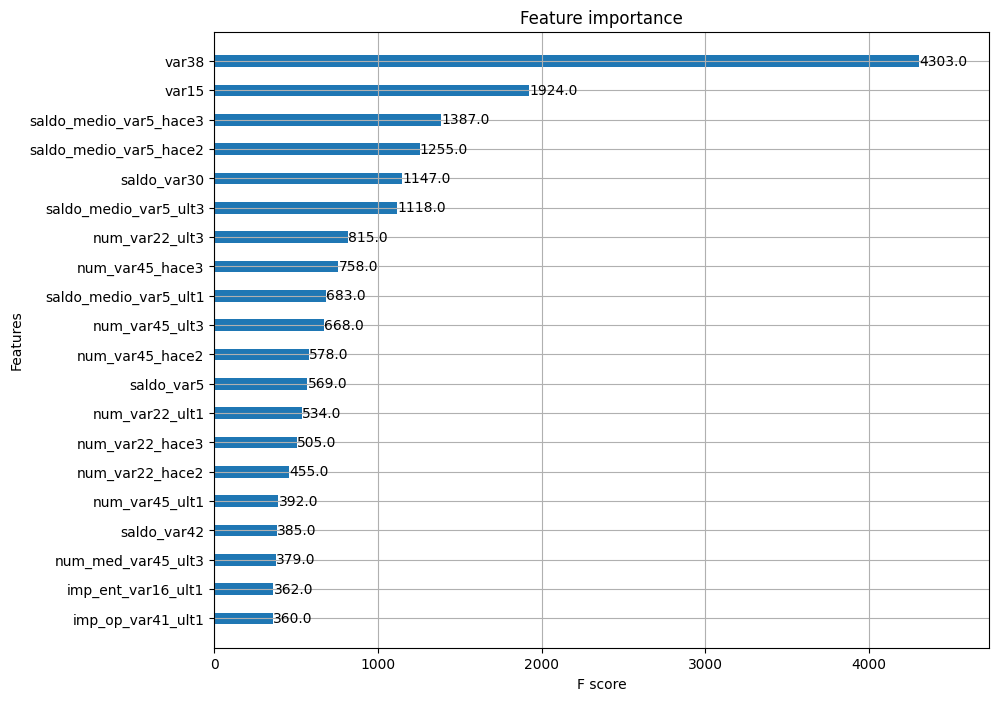

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [12]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0


In [17]:
import lightgbm
print(lightgbm.__version__)

3.3.2


In [13]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr),(X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc", eval_set=eval_set)



xgb_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

ValueError: ignored

In [36]:
from hyperopt import hp

lgbm_search_space = {
    'num_leaves':hp.quniform('num_leaves',32, 64, 1),
    'max_depth': hp.quniform("max_depth", 100, 160,1),
    'min_child_samples': hp.quniform("min_child_samples", 60, 100,1),
    'subsample': hp.uniform("subsample", 0.7,1),
    'learning_rate': hp.uniform("learning_rate", 0.01,0.2),

}

In [41]:

def objective_func(lgbm_search_space):
    xgb_clf = LGBMClassifier(n_estimators = 800,

                            # int type 필요
                            max_depth = int(lgbm_search_space['max_depth']),
                            min_child_sample = int(lgbm_search_space['min_child_samples']),
                            learning_rate = lgbm_search_space['learning_rate'],
                            subsample = lgbm_search_space['subsample'])

    roc_auc_list = []

    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):
      X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
      X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

      xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                  eval_set=[(X_tr, y_tr), (X_val, y_val)])

      score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
      roc_auc_list.append(score)


    return -1 * np.mean(roc_auc_list)

In [42]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
best = fmin(fn = objective_func,
            space = lgbm_search_space,
            algo = tpe.suggest,
            max_evals=50,
            trials = trials,
            rstate = np.random.default_rng(seed = 30))
print('best:', best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.162225	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.163483
[2]	training's auc: 0.827172	training's binary_logloss: 0.160137	valid_1's auc: 0.80445	valid_1's binary_logloss: 0.161786
[3]	training's auc: 0.833292	training's binary_logloss: 0.15829	valid_1's auc: 0.807871	valid_1's binary_logloss: 0.160307
[4]	training's auc: 0.834189	training's binary_logloss: 0.15663	valid_1's auc: 0.807478	valid_1's binary_logloss: 0.159032
[5]	training's auc: 0.835092	training's binary_logloss: 0.155106	valid_1's auc: 0.808465	valid_1's binary_logloss: 0.157796
[6]	training's auc: 0.836472	training's binary_logloss: 0.153704	valid_1's auc: 0.808726	valid_1's binary_logloss: 0.156695
[7]	training's auc: 0.836836	training's binary_logloss: 0.152412	valid_1's auc: 0.808501	valid_1's binary_logloss: 0.155685
[8]	training's auc: 0.8385	training's binary_logloss: 0.151219	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.164603	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.158926
[2]	training's auc: 0.822077	training's binary_logloss: 0.16258	valid_1's auc: 0.804437	valid_1's binary_logloss: 0.157266
[3]	training's auc: 0.823399	training's binary_logloss: 0.160751	valid_1's auc: 0.804766	valid_1's binary_logloss: 0.155782
[4]	training's auc: 0.829662	training's binary_logloss: 0.159068	valid_1's auc: 0.816987	valid_1's binary_logloss: 0.154404
[5]	training's auc: 0.832129	training's binary_logloss: 0.157526	valid_1's auc: 0.818113	valid_1's binary_logloss: 0.153158
[6]	training's auc: 0.834178	training's binary_logloss: 0.156085	valid_1's auc: 0.819082	valid_1's binary_logloss: 0.152026
[7]	training's auc: 0.834923	training's binary_logloss: 0.154769	valid_1's auc: 0.819266	valid_1's binary_logloss: 0.150985
[8]	training's auc: 0.835542	training's binary_logloss: 0.153532	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.160882	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.166494
[2]	training's auc: 0.830881	training's binary_logloss: 0.158905	valid_1's auc: 0.816224	valid_1's binary_logloss: 0.164697
[3]	training's auc: 0.831547	training's binary_logloss: 0.157153	valid_1's auc: 0.814456	valid_1's binary_logloss: 0.163161
[4]	training's auc: 0.832711	training's binary_logloss: 0.155559	valid_1's auc: 0.815062	valid_1's binary_logloss: 0.161767
[5]	training's auc: 0.834715	training's binary_logloss: 0.154087	valid_1's auc: 0.816516	valid_1's binary_logloss: 0.16041
[6]	training's auc: 0.835076	training's binary_logloss: 0.152738	valid_1's auc: 0.816225	valid_1's binary_logloss: 0.159195
[7]	training's auc: 0.837302	training's binary_logloss: 0.151486	valid_1's auc: 0.817675	valid_1's binary_logloss: 0.158109
[8]	training's auc: 0.838388	training's binary_logloss: 0.150265	valid_1's auc: 0.818509	valid_1's binary_logloss: 0.157018
[9]	train

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.152632	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.155643
[2]	training's auc: 0.835655	training's binary_logloss: 0.146378	valid_1's auc: 0.810709	valid_1's binary_logloss: 0.150721
[3]	training's auc: 0.843487	training's binary_logloss: 0.142105	valid_1's auc: 0.815487	valid_1's binary_logloss: 0.14759
[4]	training's auc: 0.848066	training's binary_logloss: 0.138728	valid_1's auc: 0.817807	valid_1's binary_logloss: 0.14523
[5]	training's auc: 0.851086	training's binary_logloss: 0.135942	valid_1's auc: 0.818983	valid_1's binary_logloss: 0.14344
[6]	training's auc: 0.853672	training's binary_logloss: 0.133666	valid_1's auc: 0.820991	valid_1's binary_logloss: 0.141887
[7]	training's auc: 0.856665	training's binary_logloss: 0.131688	valid_1's auc: 0.821538	valid_1's binary_logloss: 0.14078
[8]	training's auc: 0.861054	training's binary_logloss: 0.130002	valid_1's auc: 0.822465	valid_1's binary_logloss: 0.139893
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.155074	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.151771
[2]	training's auc: 0.831744	training's binary_logloss: 0.148708	valid_1's auc: 0.816738	valid_1's binary_logloss: 0.146873
[3]	training's auc: 0.840903	training's binary_logloss: 0.144317	valid_1's auc: 0.821302	valid_1's binary_logloss: 0.143494
[4]	training's auc: 0.848686	training's binary_logloss: 0.140966	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.141184
[5]	training's auc: 0.853093	training's binary_logloss: 0.138159	valid_1's auc: 0.827844	valid_1's binary_logloss: 0.139373
[6]	training's auc: 0.854863	training's binary_logloss: 0.135853	valid_1's auc: 0.82877	valid_1's binary_logloss: 0.137919
[7]	training's auc: 0.859923	training's binary_logloss: 0.134011	valid_1's auc: 0.829261	valid_1's binary_logloss: 0.136736
[8]	training's auc: 0.86384	training's binary_logloss: 0.132327	valid_1's auc: 0.830807	valid_1's binary_logloss: 0.135863
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.15192	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.158508
[2]	training's auc: 0.834616	training's binary_logloss: 0.145893	valid_1's auc: 0.817234	valid_1's binary_logloss: 0.153133
[3]	training's auc: 0.842027	training's binary_logloss: 0.141587	valid_1's auc: 0.821318	valid_1's binary_logloss: 0.14958
[4]	training's auc: 0.847326	training's binary_logloss: 0.13807	valid_1's auc: 0.82381	valid_1's binary_logloss: 0.147014
[5]	training's auc: 0.851652	training's binary_logloss: 0.135356	valid_1's auc: 0.826052	valid_1's binary_logloss: 0.145076
[6]	training's auc: 0.854525	training's binary_logloss: 0.133106	valid_1's auc: 0.827495	valid_1's binary_logloss: 0.14344
[7]	training's auc: 0.859561	training's binary_logloss: 0.131213	valid_1's auc: 0.827983	valid_1's binary_logloss: 0.142234
[8]	training's auc: 0.862367	training's binary_logloss: 0.129664	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.158481	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.160385
[2]	training's auc: 0.832841	training's binary_logloss: 0.154109	valid_1's auc: 0.806025	valid_1's binary_logloss: 0.156946
[3]	training's auc: 0.83452	training's binary_logloss: 0.150687	valid_1's auc: 0.806743	valid_1's binary_logloss: 0.154386
[4]	training's auc: 0.84218	training's binary_logloss: 0.147864	valid_1's auc: 0.813882	valid_1's binary_logloss: 0.152155
[5]	training's auc: 0.846269	training's binary_logloss: 0.145434	valid_1's auc: 0.815739	valid_1's binary_logloss: 0.150376
[6]	training's auc: 0.848139	training's binary_logloss: 0.143361	valid_1's auc: 0.81484	valid_1's binary_logloss: 0.148883
[7]	training's auc: 0.850617	training's binary_logloss: 0.141451	valid_1's auc: 0.817476	valid_1's binary_logloss: 0.147474
[8]	training's auc: 0.852441	training's binary_logloss: 0.139786	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.160883	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156084
[2]	training's auc: 0.82636	training's binary_logloss: 0.156451	valid_1's auc: 0.816021	valid_1's binary_logloss: 0.152656
[3]	training's auc: 0.832599	training's binary_logloss: 0.152875	valid_1's auc: 0.817747	valid_1's binary_logloss: 0.149917
[4]	training's auc: 0.834846	training's binary_logloss: 0.150018	valid_1's auc: 0.819921	valid_1's binary_logloss: 0.147631
[5]	training's auc: 0.84034	training's binary_logloss: 0.147577	valid_1's auc: 0.823207	valid_1's binary_logloss: 0.145793
[6]	training's auc: 0.845638	training's binary_logloss: 0.145482	valid_1's auc: 0.826213	valid_1's binary_logloss: 0.144183
[7]	training's auc: 0.850039	training's binary_logloss: 0.143554	valid_1's auc: 0.827939	valid_1's binary_logloss: 0.142789
[8]	training's auc: 0.851849	training's binary_logloss: 0.141916	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.157395	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.163363
[2]	training's auc: 0.831489	training's binary_logloss: 0.153162	valid_1's auc: 0.814459	valid_1's binary_logloss: 0.159568
[3]	training's auc: 0.83599	training's binary_logloss: 0.149765	valid_1's auc: 0.817084	valid_1's binary_logloss: 0.156677
[4]	training's auc: 0.838096	training's binary_logloss: 0.147028	valid_1's auc: 0.818544	valid_1's binary_logloss: 0.154282
[5]	training's auc: 0.84429	training's binary_logloss: 0.144559	valid_1's auc: 0.823355	valid_1's binary_logloss: 0.152204
[6]	training's auc: 0.847642	training's binary_logloss: 0.142442	valid_1's auc: 0.824572	valid_1's binary_logloss: 0.150489
[7]	training's auc: 0.850389	training's binary_logloss: 0.140628	valid_1's auc: 0.826549	valid_1's binary_logloss: 0.148923
[8]	training's auc: 0.851664	training's binary_logloss: 0.138914	valid_1's auc: 0.827511	valid_1's binary_logloss: 0.147643
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.15504	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.157575
[2]	training's auc: 0.834033	training's binary_logloss: 0.149344	valid_1's auc: 0.808708	valid_1's binary_logloss: 0.153043
[3]	training's auc: 0.842615	training's binary_logloss: 0.145265	valid_1's auc: 0.815718	valid_1's binary_logloss: 0.149908
[4]	training's auc: 0.847162	training's binary_logloss: 0.142006	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.147594
[5]	training's auc: 0.850571	training's binary_logloss: 0.139292	valid_1's auc: 0.81865	valid_1's binary_logloss: 0.145714
[6]	training's auc: 0.852997	training's binary_logloss: 0.137036	valid_1's auc: 0.819578	valid_1's binary_logloss: 0.14419
[7]	training's auc: 0.857308	training's binary_logloss: 0.135137	valid_1's auc: 0.820111	valid_1's binary_logloss: 0.142893
[8]	training's auc: 0.859915	training's binary_logloss: 0.133353	valid_1's auc: 0.82164	valid_1's binary_logloss: 0.141734
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.157464	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.153521
[2]	training's auc: 0.828301	training's binary_logloss: 0.15177	valid_1's auc: 0.814899	valid_1's binary_logloss: 0.149171
[3]	training's auc: 0.83779	training's binary_logloss: 0.147519	valid_1's auc: 0.818762	valid_1's binary_logloss: 0.146029
[4]	training's auc: 0.844309	training's binary_logloss: 0.144222	valid_1's auc: 0.824382	valid_1's binary_logloss: 0.143608
[5]	training's auc: 0.848846	training's binary_logloss: 0.141489	valid_1's auc: 0.826658	valid_1's binary_logloss: 0.141624
[6]	training's auc: 0.852026	training's binary_logloss: 0.139151	valid_1's auc: 0.829266	valid_1's binary_logloss: 0.140002
[7]	training's auc: 0.854508	training's binary_logloss: 0.137169	valid_1's auc: 0.83065	valid_1's binary_logloss: 0.138684
[8]	training's auc: 0.857838	training's binary_logloss: 0.135445	valid_1's auc: 0.830431	valid_1's binary_logloss: 0.137699
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.15418	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.160501
[2]	training's auc: 0.832651	training's binary_logloss: 0.148603	valid_1's auc: 0.815296	valid_1's binary_logloss: 0.155501
[3]	training's auc: 0.840128	training's binary_logloss: 0.144513	valid_1's auc: 0.820937	valid_1's binary_logloss: 0.152
[4]	training's auc: 0.844863	training's binary_logloss: 0.141344	valid_1's auc: 0.822708	valid_1's binary_logloss: 0.149417
[5]	training's auc: 0.849989	training's binary_logloss: 0.138588	valid_1's auc: 0.826011	valid_1's binary_logloss: 0.147283
[6]	training's auc: 0.852259	training's binary_logloss: 0.13633	valid_1's auc: 0.827622	valid_1's binary_logloss: 0.145579
[7]	training's auc: 0.854795	training's binary_logloss: 0.134474	valid_1's auc: 0.829108	valid_1's binary_logloss: 0.144171
[8]	training's auc: 0.857144	training's binary_logloss: 0.13281	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.159015	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.160824
[2]	training's auc: 0.832674	training's binary_logloss: 0.154901	valid_1's auc: 0.805912	valid_1's binary_logloss: 0.157638
[3]	training's auc: 0.834009	training's binary_logloss: 0.151623	valid_1's auc: 0.806799	valid_1's binary_logloss: 0.155131
[4]	training's auc: 0.839352	training's binary_logloss: 0.148835	valid_1's auc: 0.810761	valid_1's binary_logloss: 0.152909
[5]	training's auc: 0.844423	training's binary_logloss: 0.14647	valid_1's auc: 0.813451	valid_1's binary_logloss: 0.151058
[6]	training's auc: 0.847033	training's binary_logloss: 0.144412	valid_1's auc: 0.816639	valid_1's binary_logloss: 0.149503
[7]	training's auc: 0.84792	training's binary_logloss: 0.14261	valid_1's auc: 0.818159	valid_1's binary_logloss: 0.148088
[8]	training's auc: 0.850782	training's binary_logloss: 0.140949	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.161413	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156486
[2]	training's auc: 0.826862	training's binary_logloss: 0.157304	valid_1's auc: 0.817438	valid_1's binary_logloss: 0.153101
[3]	training's auc: 0.833105	training's binary_logloss: 0.15392	valid_1's auc: 0.819611	valid_1's binary_logloss: 0.150461
[4]	training's auc: 0.835151	training's binary_logloss: 0.151175	valid_1's auc: 0.820014	valid_1's binary_logloss: 0.148294
[5]	training's auc: 0.840137	training's binary_logloss: 0.148814	valid_1's auc: 0.823417	valid_1's binary_logloss: 0.146516
[6]	training's auc: 0.84506	training's binary_logloss: 0.146764	valid_1's auc: 0.825862	valid_1's binary_logloss: 0.144973
[7]	training's auc: 0.849207	training's binary_logloss: 0.144882	valid_1's auc: 0.828393	valid_1's binary_logloss: 0.143654
[8]	training's auc: 0.850137	training's binary_logloss: 0.143217	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.157893	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.163808
[2]	training's auc: 0.831466	training's binary_logloss: 0.153922	valid_1's auc: 0.814406	valid_1's binary_logloss: 0.16024
[3]	training's auc: 0.834655	training's binary_logloss: 0.150782	valid_1's auc: 0.816009	valid_1's binary_logloss: 0.157411
[4]	training's auc: 0.838788	training's binary_logloss: 0.148159	valid_1's auc: 0.819092	valid_1's binary_logloss: 0.15506
[5]	training's auc: 0.842444	training's binary_logloss: 0.145867	valid_1's auc: 0.820523	valid_1's binary_logloss: 0.153014
[6]	training's auc: 0.848455	training's binary_logloss: 0.143741	valid_1's auc: 0.825186	valid_1's binary_logloss: 0.151322
[7]	training's auc: 0.85077	training's binary_logloss: 0.141974	valid_1's auc: 0.826415	valid_1's binary_logloss: 0.14984
[8]	training's auc: 0.852624	training's binary_logloss: 0.140266	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.163215	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.164309
[2]	training's auc: 0.827206	training's binary_logloss: 0.161949	valid_1's auc: 0.805069	valid_1's binary_logloss: 0.163251
[3]	training's auc: 0.827629	training's binary_logloss: 0.160774	valid_1's auc: 0.804855	valid_1's binary_logloss: 0.162305
[4]	training's auc: 0.832975	training's binary_logloss: 0.159659	valid_1's auc: 0.807973	valid_1's binary_logloss: 0.161424
[5]	training's auc: 0.833743	training's binary_logloss: 0.158609	valid_1's auc: 0.807907	valid_1's binary_logloss: 0.160612
[6]	training's auc: 0.834124	training's binary_logloss: 0.157626	valid_1's auc: 0.80801	valid_1's binary_logloss: 0.15982
[7]	training's auc: 0.834845	training's binary_logloss: 0.156693	valid_1's auc: 0.80816	valid_1's binary_logloss: 0.159067
[8]	training's auc: 0.836129	training's binary_logloss: 0.155807	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.165588	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.159686
[2]	training's auc: 0.819273	training's binary_logloss: 0.164347	valid_1's auc: 0.802595	valid_1's binary_logloss: 0.158692
[3]	training's auc: 0.821869	training's binary_logloss: 0.163188	valid_1's auc: 0.804867	valid_1's binary_logloss: 0.157742
[4]	training's auc: 0.823216	training's binary_logloss: 0.162095	valid_1's auc: 0.805384	valid_1's binary_logloss: 0.156856
[5]	training's auc: 0.823975	training's binary_logloss: 0.161069	valid_1's auc: 0.805689	valid_1's binary_logloss: 0.156025
[6]	training's auc: 0.829149	training's binary_logloss: 0.160077	valid_1's auc: 0.816338	valid_1's binary_logloss: 0.155206
[7]	training's auc: 0.830356	training's binary_logloss: 0.159137	valid_1's auc: 0.816995	valid_1's binary_logloss: 0.154438
[8]	training's auc: 0.831969	training's binary_logloss: 0.158237	valid_1's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.161804	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.167325
[2]	training's auc: 0.827205	training's binary_logloss: 0.160622	valid_1's auc: 0.811332	valid_1's binary_logloss: 0.16623
[3]	training's auc: 0.83112	training's binary_logloss: 0.159495	valid_1's auc: 0.815259	valid_1's binary_logloss: 0.165195
[4]	training's auc: 0.831115	training's binary_logloss: 0.158445	valid_1's auc: 0.815382	valid_1's binary_logloss: 0.164239
[5]	training's auc: 0.831981	training's binary_logloss: 0.157462	valid_1's auc: 0.816051	valid_1's binary_logloss: 0.163355
[6]	training's auc: 0.832262	training's binary_logloss: 0.156536	valid_1's auc: 0.816114	valid_1's binary_logloss: 0.162518
[7]	training's auc: 0.832843	training's binary_logloss: 0.155643	valid_1's auc: 0.816153	valid_1's binary_logloss: 0.161701
[8]	training's auc: 0.834159	training's binary_logloss: 0.154782	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.151608	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.154833
[2]	training's auc: 0.835756	training's binary_logloss: 0.145231	valid_1's auc: 0.810724	valid_1's binary_logloss: 0.149826
[3]	training's auc: 0.844115	training's binary_logloss: 0.140868	valid_1's auc: 0.815907	valid_1's binary_logloss: 0.146661
[4]	training's auc: 0.849616	training's binary_logloss: 0.137451	valid_1's auc: 0.816999	valid_1's binary_logloss: 0.144479
[5]	training's auc: 0.853417	training's binary_logloss: 0.134695	valid_1's auc: 0.819967	valid_1's binary_logloss: 0.142757
[6]	training's auc: 0.856829	training's binary_logloss: 0.132489	valid_1's auc: 0.822354	valid_1's binary_logloss: 0.141356
[7]	training's auc: 0.86132	training's binary_logloss: 0.130517	valid_1's auc: 0.823442	valid_1's binary_logloss: 0.140308
[8]	training's auc: 0.865755	training's binary_logloss: 0.128857	valid_1's auc: 0.824954	valid_1's binary_logloss: 0.139559
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.154058	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.151041
[2]	training's auc: 0.83223	training's binary_logloss: 0.14746	valid_1's auc: 0.816858	valid_1's binary_logloss: 0.146005
[3]	training's auc: 0.840791	training's binary_logloss: 0.143025	valid_1's auc: 0.820738	valid_1's binary_logloss: 0.142704
[4]	training's auc: 0.848941	training's binary_logloss: 0.139644	valid_1's auc: 0.826987	valid_1's binary_logloss: 0.140339
[5]	training's auc: 0.852826	training's binary_logloss: 0.136896	valid_1's auc: 0.828747	valid_1's binary_logloss: 0.138438
[6]	training's auc: 0.855461	training's binary_logloss: 0.13466	valid_1's auc: 0.828876	valid_1's binary_logloss: 0.137241
[7]	training's auc: 0.86093	training's binary_logloss: 0.132655	valid_1's auc: 0.829449	valid_1's binary_logloss: 0.136202
[8]	training's auc: 0.866626	training's binary_logloss: 0.130915	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.150954	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.157663
[2]	training's auc: 0.835986	training's binary_logloss: 0.144747	valid_1's auc: 0.817533	valid_1's binary_logloss: 0.152072
[3]	training's auc: 0.842581	training's binary_logloss: 0.140452	valid_1's auc: 0.821973	valid_1's binary_logloss: 0.148546
[4]	training's auc: 0.848224	training's binary_logloss: 0.136885	valid_1's auc: 0.825037	valid_1's binary_logloss: 0.146033
[5]	training's auc: 0.852246	training's binary_logloss: 0.134192	valid_1's auc: 0.827533	valid_1's binary_logloss: 0.144158
[6]	training's auc: 0.856269	training's binary_logloss: 0.131984	valid_1's auc: 0.82833	valid_1's binary_logloss: 0.142601
[7]	training's auc: 0.861242	training's binary_logloss: 0.130139	valid_1's auc: 0.829258	valid_1's binary_logloss: 0.14141
[8]	training's auc: 0.865489	training's binary_logloss: 0.128503	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.150217	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.153748
[2]	training's auc: 0.836205	training's binary_logloss: 0.143743	valid_1's auc: 0.808675	valid_1's binary_logloss: 0.148651
[3]	training's auc: 0.84709	training's binary_logloss: 0.13936	valid_1's auc: 0.814811	valid_1's binary_logloss: 0.14561
[4]	training's auc: 0.852771	training's binary_logloss: 0.135854	valid_1's auc: 0.819728	valid_1's binary_logloss: 0.143338
[5]	training's auc: 0.857582	training's binary_logloss: 0.133026	valid_1's auc: 0.821879	valid_1's binary_logloss: 0.141598
[6]	training's auc: 0.860709	training's binary_logloss: 0.130896	valid_1's auc: 0.824151	valid_1's binary_logloss: 0.140372
[7]	training's auc: 0.865881	training's binary_logloss: 0.128891	valid_1's auc: 0.825016	valid_1's binary_logloss: 0.139421
[8]	training's auc: 0.870166	training's binary_logloss: 0.127342	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.152681	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.150069
[2]	training's auc: 0.836039	training's binary_logloss: 0.145904	valid_1's auc: 0.817959	valid_1's binary_logloss: 0.145206
[3]	training's auc: 0.845428	training's binary_logloss: 0.141385	valid_1's auc: 0.824303	valid_1's binary_logloss: 0.141948
[4]	training's auc: 0.851443	training's binary_logloss: 0.13805	valid_1's auc: 0.82894	valid_1's binary_logloss: 0.139741
[5]	training's auc: 0.855413	training's binary_logloss: 0.135318	valid_1's auc: 0.829769	valid_1's binary_logloss: 0.138116
[6]	training's auc: 0.860585	training's binary_logloss: 0.133155	valid_1's auc: 0.830915	valid_1's binary_logloss: 0.136821
[7]	training's auc: 0.86597	training's binary_logloss: 0.131151	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.135862
[8]	training's auc: 0.868872	training's binary_logloss: 0.12956	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.149637	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.156518
[2]	training's auc: 0.838108	training's binary_logloss: 0.143283	valid_1's auc: 0.819162	valid_1's binary_logloss: 0.15092
[3]	training's auc: 0.846838	training's binary_logloss: 0.138631	valid_1's auc: 0.824387	valid_1's binary_logloss: 0.14755
[4]	training's auc: 0.850592	training's binary_logloss: 0.135353	valid_1's auc: 0.826338	valid_1's binary_logloss: 0.145113
[5]	training's auc: 0.855463	training's binary_logloss: 0.132709	valid_1's auc: 0.827268	valid_1's binary_logloss: 0.143383
[6]	training's auc: 0.859361	training's binary_logloss: 0.130567	valid_1's auc: 0.827193	valid_1's binary_logloss: 0.142082
[7]	training's auc: 0.86265	training's binary_logloss: 0.128762	valid_1's auc: 0.827977	valid_1's binary_logloss: 0.140999
[8]	training's auc: 0.866703	training's binary_logloss: 0.127098	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.15169	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.154898
[2]	training's auc: 0.835698	training's binary_logloss: 0.145333	valid_1's auc: 0.81061	valid_1's binary_logloss: 0.149909
[3]	training's auc: 0.844252	training's binary_logloss: 0.140971	valid_1's auc: 0.81569	valid_1's binary_logloss: 0.14674
[4]	training's auc: 0.849766	training's binary_logloss: 0.137546	valid_1's auc: 0.817006	valid_1's binary_logloss: 0.144545
[5]	training's auc: 0.853611	training's binary_logloss: 0.13479	valid_1's auc: 0.819916	valid_1's binary_logloss: 0.142835
[6]	training's auc: 0.858997	training's binary_logloss: 0.132542	valid_1's auc: 0.821357	valid_1's binary_logloss: 0.14161
[7]	training's auc: 0.863499	training's binary_logloss: 0.13053	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.14032
[8]	training's auc: 0.867235	training's binary_logloss: 0.128919	valid_1's auc: 0.824613	valid_1's binary_logloss: 0.139585
[9]	training's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.15414	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.151099
[2]	training's auc: 0.832215	training's binary_logloss: 0.147552	valid_1's auc: 0.816865	valid_1's binary_logloss: 0.146068
[3]	training's auc: 0.840773	training's binary_logloss: 0.143128	valid_1's auc: 0.82073	valid_1's binary_logloss: 0.142769
[4]	training's auc: 0.848956	training's binary_logloss: 0.139765	valid_1's auc: 0.826975	valid_1's binary_logloss: 0.140396
[5]	training's auc: 0.852057	training's binary_logloss: 0.137043	valid_1's auc: 0.828653	valid_1's binary_logloss: 0.138547
[6]	training's auc: 0.855384	training's binary_logloss: 0.134709	valid_1's auc: 0.828061	valid_1's binary_logloss: 0.137359
[7]	training's auc: 0.860806	training's binary_logloss: 0.132693	valid_1's auc: 0.829007	valid_1's binary_logloss: 0.136293
[8]	training's auc: 0.866266	training's binary_logloss: 0.13096	valid_1's auc: 0.830883	valid_1's binary_logloss: 0.135404
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.151032	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.157731
[2]	training's auc: 0.835986	training's binary_logloss: 0.144835	valid_1's auc: 0.817532	valid_1's binary_logloss: 0.152145
[3]	training's auc: 0.842556	training's binary_logloss: 0.140542	valid_1's auc: 0.822022	valid_1's binary_logloss: 0.148616
[4]	training's auc: 0.848203	training's binary_logloss: 0.136977	valid_1's auc: 0.825052	valid_1's binary_logloss: 0.146099
[5]	training's auc: 0.852133	training's binary_logloss: 0.134256	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.144262
[6]	training's auc: 0.855646	training's binary_logloss: 0.132045	valid_1's auc: 0.828043	valid_1's binary_logloss: 0.142707
[7]	training's auc: 0.861146	training's binary_logloss: 0.130111	valid_1's auc: 0.829543	valid_1's binary_logloss: 0.141437
[8]	training's auc: 0.863813	training's binary_logloss: 0.12858	valid_1's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.158024	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.160008
[2]	training's auc: 0.832842	training's binary_logloss: 0.153442	valid_1's auc: 0.806029	valid_1's binary_logloss: 0.156409
[3]	training's auc: 0.835779	training's binary_logloss: 0.149876	valid_1's auc: 0.80871	valid_1's binary_logloss: 0.153609
[4]	training's auc: 0.843846	training's binary_logloss: 0.146977	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.15139
[5]	training's auc: 0.846996	training's binary_logloss: 0.144499	valid_1's auc: 0.817169	valid_1's binary_logloss: 0.149473
[6]	training's auc: 0.848154	training's binary_logloss: 0.14231	valid_1's auc: 0.818521	valid_1's binary_logloss: 0.147867
[7]	training's auc: 0.851371	training's binary_logloss: 0.140486	valid_1's auc: 0.821001	valid_1's binary_logloss: 0.146485
[8]	training's auc: 0.852982	training's binary_logloss: 0.13881	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.160428	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.15574
[2]	training's auc: 0.826684	training's binary_logloss: 0.155778	valid_1's auc: 0.81556	valid_1's binary_logloss: 0.152188
[3]	training's auc: 0.832624	training's binary_logloss: 0.15208	valid_1's auc: 0.817753	valid_1's binary_logloss: 0.149358
[4]	training's auc: 0.83615	training's binary_logloss: 0.149113	valid_1's auc: 0.820524	valid_1's binary_logloss: 0.147029
[5]	training's auc: 0.840684	training's binary_logloss: 0.146614	valid_1's auc: 0.823607	valid_1's binary_logloss: 0.145123
[6]	training's auc: 0.848081	training's binary_logloss: 0.144404	valid_1's auc: 0.828186	valid_1's binary_logloss: 0.143558
[7]	training's auc: 0.850146	training's binary_logloss: 0.142479	valid_1's auc: 0.829166	valid_1's binary_logloss: 0.142125
[8]	training's auc: 0.852356	training's binary_logloss: 0.140787	valid_1's auc: 0.829488	valid_1's binary_logloss: 0.140907
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.156968	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.162981
[2]	training's auc: 0.83279	training's binary_logloss: 0.152448	valid_1's auc: 0.815362	valid_1's binary_logloss: 0.158898
[3]	training's auc: 0.83679	training's binary_logloss: 0.148957	valid_1's auc: 0.817818	valid_1's binary_logloss: 0.15587
[4]	training's auc: 0.839656	training's binary_logloss: 0.146118	valid_1's auc: 0.818636	valid_1's binary_logloss: 0.153485
[5]	training's auc: 0.845283	training's binary_logloss: 0.143523	valid_1's auc: 0.823299	valid_1's binary_logloss: 0.151378
[6]	training's auc: 0.849535	training's binary_logloss: 0.141356	valid_1's auc: 0.82608	valid_1's binary_logloss: 0.149646
[7]	training's auc: 0.850975	training's binary_logloss: 0.139476	valid_1's auc: 0.826939	valid_1's binary_logloss: 0.148116
[8]	training's auc: 0.853346	training's binary_logloss: 0.137807	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.147445	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.151655
[2]	training's auc: 0.840889	training's binary_logloss: 0.140948	valid_1's auc: 0.809531	valid_1's binary_logloss: 0.146937
[3]	training's auc: 0.848092	training's binary_logloss: 0.136507	valid_1's auc: 0.816919	valid_1's binary_logloss: 0.143871
[4]	training's auc: 0.852963	training's binary_logloss: 0.133163	valid_1's auc: 0.818939	valid_1's binary_logloss: 0.141841
[5]	training's auc: 0.860016	training's binary_logloss: 0.130475	valid_1's auc: 0.819239	valid_1's binary_logloss: 0.140743
[6]	training's auc: 0.86567	training's binary_logloss: 0.128372	valid_1's auc: 0.820661	valid_1's binary_logloss: 0.139881
[7]	training's auc: 0.870112	training's binary_logloss: 0.126441	valid_1's auc: 0.82063	valid_1's binary_logloss: 0.1394
[8]	training's auc: 0.872762	training's binary_logloss: 0.124953	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.149946	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.148223
[2]	training's auc: 0.836841	training's binary_logloss: 0.143089	valid_1's auc: 0.819484	valid_1's binary_logloss: 0.143478
[3]	training's auc: 0.847285	training's binary_logloss: 0.138573	valid_1's auc: 0.824592	valid_1's binary_logloss: 0.140639
[4]	training's auc: 0.85312	training's binary_logloss: 0.135169	valid_1's auc: 0.827469	valid_1's binary_logloss: 0.138625
[5]	training's auc: 0.85902	training's binary_logloss: 0.132575	valid_1's auc: 0.827328	valid_1's binary_logloss: 0.137179
[6]	training's auc: 0.864138	training's binary_logloss: 0.130371	valid_1's auc: 0.829092	valid_1's binary_logloss: 0.136076
[7]	training's auc: 0.868716	training's binary_logloss: 0.128575	valid_1's auc: 0.83018	valid_1's binary_logloss: 0.135309
[8]	training's auc: 0.872701	training's binary_logloss: 0.126899	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.146983	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.154248
[2]	training's auc: 0.839313	training's binary_logloss: 0.14029	valid_1's auc: 0.820756	valid_1's binary_logloss: 0.149065
[3]	training's auc: 0.84739	training's binary_logloss: 0.135657	valid_1's auc: 0.824382	valid_1's binary_logloss: 0.145875
[4]	training's auc: 0.852345	training's binary_logloss: 0.132489	valid_1's auc: 0.827272	valid_1's binary_logloss: 0.143526
[5]	training's auc: 0.859781	training's binary_logloss: 0.129867	valid_1's auc: 0.828145	valid_1's binary_logloss: 0.142075
[6]	training's auc: 0.866822	training's binary_logloss: 0.12765	valid_1's auc: 0.830754	valid_1's binary_logloss: 0.140855
[7]	training's auc: 0.869934	training's binary_logloss: 0.125894	valid_1's auc: 0.831479	valid_1's binary_logloss: 0.140118
[8]	training's auc: 0.873307	training's binary_logloss: 0.124454	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.158843	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.160682
[2]	training's auc: 0.832666	training's binary_logloss: 0.154641	valid_1's auc: 0.805913	valid_1's binary_logloss: 0.157429
[3]	training's auc: 0.833996	training's binary_logloss: 0.151309	valid_1's auc: 0.806733	valid_1's binary_logloss: 0.154897
[4]	training's auc: 0.840847	training's binary_logloss: 0.148487	valid_1's auc: 0.810833	valid_1's binary_logloss: 0.15268
[5]	training's auc: 0.845647	training's binary_logloss: 0.146117	valid_1's auc: 0.814828	valid_1's binary_logloss: 0.150838
[6]	training's auc: 0.848086	training's binary_logloss: 0.144079	valid_1's auc: 0.815921	valid_1's binary_logloss: 0.149343
[7]	training's auc: 0.849611	training's binary_logloss: 0.142189	valid_1's auc: 0.817206	valid_1's binary_logloss: 0.14803
[8]	training's auc: 0.850885	training's binary_logloss: 0.140571	valid_1's auc: 0.819131	valid_1's binary_logloss: 0.146775
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.161242	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156356
[2]	training's auc: 0.826913	training's binary_logloss: 0.157044	valid_1's auc: 0.817441	valid_1's binary_logloss: 0.152899
[3]	training's auc: 0.833077	training's binary_logloss: 0.153624	valid_1's auc: 0.819082	valid_1's binary_logloss: 0.15027
[4]	training's auc: 0.834522	training's binary_logloss: 0.150878	valid_1's auc: 0.819605	valid_1's binary_logloss: 0.148041
[5]	training's auc: 0.839248	training's binary_logloss: 0.148503	valid_1's auc: 0.82292	valid_1's binary_logloss: 0.146281
[6]	training's auc: 0.844484	training's binary_logloss: 0.1464	valid_1's auc: 0.825099	valid_1's binary_logloss: 0.144702
[7]	training's auc: 0.848575	training's binary_logloss: 0.144474	valid_1's auc: 0.827653	valid_1's binary_logloss: 0.143319
[8]	training's auc: 0.84999	training's binary_logloss: 0.142799	valid_1's auc: 0.828202	valid_1's binary_logloss: 0.142061
[9]	training's

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.157732	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.163664
[2]	training's auc: 0.831442	training's binary_logloss: 0.153674	valid_1's auc: 0.814431	valid_1's binary_logloss: 0.160021
[3]	training's auc: 0.834634	training's binary_logloss: 0.150479	valid_1's auc: 0.815976	valid_1's binary_logloss: 0.157148
[4]	training's auc: 0.838744	training's binary_logloss: 0.147801	valid_1's auc: 0.819113	valid_1's binary_logloss: 0.154791
[5]	training's auc: 0.84255	training's binary_logloss: 0.145473	valid_1's auc: 0.820854	valid_1's binary_logloss: 0.152715
[6]	training's auc: 0.84856	training's binary_logloss: 0.143334	valid_1's auc: 0.825569	valid_1's binary_logloss: 0.15102
[7]	training's auc: 0.851065	training's binary_logloss: 0.141534	valid_1's auc: 0.826483	valid_1's binary_logloss: 0.149537
[8]	training's auc: 0.852955	training's binary_logloss: 0.139809	valid_1's auc: 0.827721	valid_1's binary_logloss: 0.148223
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.147747	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.151877
[2]	training's auc: 0.840486	training's binary_logloss: 0.141234	valid_1's auc: 0.809639	valid_1's binary_logloss: 0.147053
[3]	training's auc: 0.847891	training's binary_logloss: 0.136771	valid_1's auc: 0.816322	valid_1's binary_logloss: 0.144117
[4]	training's auc: 0.852977	training's binary_logloss: 0.133298	valid_1's auc: 0.819388	valid_1's binary_logloss: 0.14188
[5]	training's auc: 0.858883	training's binary_logloss: 0.130778	valid_1's auc: 0.822051	valid_1's binary_logloss: 0.140483
[6]	training's auc: 0.86521	training's binary_logloss: 0.128685	valid_1's auc: 0.822645	valid_1's binary_logloss: 0.139668
[7]	training's auc: 0.868895	training's binary_logloss: 0.127005	valid_1's auc: 0.824224	valid_1's binary_logloss: 0.138912
[8]	training's auc: 0.871901	training's binary_logloss: 0.125411	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.150242	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.148416
[2]	training's auc: 0.834976	training's binary_logloss: 0.143381	valid_1's auc: 0.818136	valid_1's binary_logloss: 0.143654
[3]	training's auc: 0.846148	training's binary_logloss: 0.138922	valid_1's auc: 0.826441	valid_1's binary_logloss: 0.140505
[4]	training's auc: 0.852254	training's binary_logloss: 0.135453	valid_1's auc: 0.827647	valid_1's binary_logloss: 0.138527
[5]	training's auc: 0.858993	training's binary_logloss: 0.13274	valid_1's auc: 0.828663	valid_1's binary_logloss: 0.136986
[6]	training's auc: 0.863877	training's binary_logloss: 0.130693	valid_1's auc: 0.829582	valid_1's binary_logloss: 0.136066
[7]	training's auc: 0.868552	training's binary_logloss: 0.12886	valid_1's auc: 0.829415	valid_1's binary_logloss: 0.135211
[8]	training's auc: 0.870803	training's binary_logloss: 0.127179	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.147274	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.154494
[2]	training's auc: 0.839298	training's binary_logloss: 0.140576	valid_1's auc: 0.820764	valid_1's binary_logloss: 0.149278
[3]	training's auc: 0.846697	training's binary_logloss: 0.136083	valid_1's auc: 0.824847	valid_1's binary_logloss: 0.145893
[4]	training's auc: 0.852188	training's binary_logloss: 0.13287	valid_1's auc: 0.827515	valid_1's binary_logloss: 0.143486
[5]	training's auc: 0.858056	training's binary_logloss: 0.130252	valid_1's auc: 0.827205	valid_1's binary_logloss: 0.141959
[6]	training's auc: 0.861639	training's binary_logloss: 0.12812	valid_1's auc: 0.827521	valid_1's binary_logloss: 0.14077
[7]	training's auc: 0.866833	training's binary_logloss: 0.126273	valid_1's auc: 0.831739	valid_1's binary_logloss: 0.139874
[8]	training's auc: 0.871195	training's binary_logloss: 0.124707	valid_1's auc: 0.83274	valid_1's binary_logloss: 0.139188
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.160027	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.16166
[2]	training's auc: 0.832691	training's binary_logloss: 0.156445	valid_1's auc: 0.805527	valid_1's binary_logloss: 0.158927
[3]	training's auc: 0.834192	training's binary_logloss: 0.153502	valid_1's auc: 0.807333	valid_1's binary_logloss: 0.156592
[4]	training's auc: 0.836468	training's binary_logloss: 0.151022	valid_1's auc: 0.808269	valid_1's binary_logloss: 0.154608
[5]	training's auc: 0.842172	training's binary_logloss: 0.148815	valid_1's auc: 0.811651	valid_1's binary_logloss: 0.152948
[6]	training's auc: 0.845473	training's binary_logloss: 0.146872	valid_1's auc: 0.815483	valid_1's binary_logloss: 0.151468
[7]	training's auc: 0.847144	training's binary_logloss: 0.145155	valid_1's auc: 0.817219	valid_1's binary_logloss: 0.150148
[8]	training's auc: 0.848701	training's binary_logloss: 0.143545	valid_1's auc: 0.818308	valid_1's binary_logloss: 0.148922
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.162419	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.157252
[2]	training's auc: 0.823422	training's binary_logloss: 0.158909	valid_1's auc: 0.804254	valid_1's binary_logloss: 0.154441
[3]	training's auc: 0.831134	training's binary_logloss: 0.155895	valid_1's auc: 0.81583	valid_1's binary_logloss: 0.152059
[4]	training's auc: 0.834824	training's binary_logloss: 0.153346	valid_1's auc: 0.818368	valid_1's binary_logloss: 0.150051
[5]	training's auc: 0.835327	training's binary_logloss: 0.15118	valid_1's auc: 0.819302	valid_1's binary_logloss: 0.148314
[6]	training's auc: 0.839763	training's binary_logloss: 0.149234	valid_1's auc: 0.822513	valid_1's binary_logloss: 0.146918
[7]	training's auc: 0.840814	training's binary_logloss: 0.147509	valid_1's auc: 0.822371	valid_1's binary_logloss: 0.145657
[8]	training's auc: 0.844954	training's binary_logloss: 0.145919	valid_1's auc: 0.82475	valid_1's binary_logloss: 0.144496
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.158835	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.164653
[2]	training's auc: 0.830738	training's binary_logloss: 0.155441	valid_1's auc: 0.81491	valid_1's binary_logloss: 0.161575
[3]	training's auc: 0.833449	training's binary_logloss: 0.152625	valid_1's auc: 0.81509	valid_1's binary_logloss: 0.159116
[4]	training's auc: 0.836945	training's binary_logloss: 0.150174	valid_1's auc: 0.817831	valid_1's binary_logloss: 0.156881
[5]	training's auc: 0.837763	training's binary_logloss: 0.148096	valid_1's auc: 0.818017	valid_1's binary_logloss: 0.155051
[6]	training's auc: 0.840376	training's binary_logloss: 0.146171	valid_1's auc: 0.818831	valid_1's binary_logloss: 0.153508
[7]	training's auc: 0.847562	training's binary_logloss: 0.144389	valid_1's auc: 0.82401	valid_1's binary_logloss: 0.152005
[8]	training's auc: 0.849687	training's binary_logloss: 0.142851	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.153476	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.156317
[2]	training's auc: 0.835546	training's binary_logloss: 0.147391	valid_1's auc: 0.810478	valid_1's binary_logloss: 0.151555
[3]	training's auc: 0.842823	training's binary_logloss: 0.143171	valid_1's auc: 0.815104	valid_1's binary_logloss: 0.148277
[4]	training's auc: 0.848912	training's binary_logloss: 0.139721	valid_1's auc: 0.817652	valid_1's binary_logloss: 0.145992
[5]	training's auc: 0.851455	training's binary_logloss: 0.136922	valid_1's auc: 0.818207	valid_1's binary_logloss: 0.144175
[6]	training's auc: 0.854196	training's binary_logloss: 0.134691	valid_1's auc: 0.820411	valid_1's binary_logloss: 0.142631
[7]	training's auc: 0.856975	training's binary_logloss: 0.132694	valid_1's auc: 0.821885	valid_1's binary_logloss: 0.141348
[8]	training's auc: 0.862264	training's binary_logloss: 0.130995	valid_1's auc: 0.821887	valid_1's binary_logloss: 0.140595
[9]	train

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.155912	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.15238
[2]	training's auc: 0.83171	training's binary_logloss: 0.149712	valid_1's auc: 0.81676	valid_1's binary_logloss: 0.147581
[3]	training's auc: 0.839282	training's binary_logloss: 0.145238	valid_1's auc: 0.820621	valid_1's binary_logloss: 0.144261
[4]	training's auc: 0.847261	training's binary_logloss: 0.141834	valid_1's auc: 0.826211	valid_1's binary_logloss: 0.141853
[5]	training's auc: 0.852588	training's binary_logloss: 0.13915	valid_1's auc: 0.828734	valid_1's binary_logloss: 0.140063
[6]	training's auc: 0.856757	training's binary_logloss: 0.136796	valid_1's auc: 0.830643	valid_1's binary_logloss: 0.13856
[7]	training's auc: 0.858448	training's binary_logloss: 0.134926	valid_1's auc: 0.830798	valid_1's binary_logloss: 0.1373
[8]	training's auc: 0.861428	training's binary_logloss: 0.13327	valid_1's auc: 0.831818	valid_1's binary_logloss: 0.136275
[9]	training's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.152714	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.159206
[2]	training's auc: 0.834332	training's binary_logloss: 0.146848	valid_1's auc: 0.816885	valid_1's binary_logloss: 0.153912
[3]	training's auc: 0.845843	training's binary_logloss: 0.142449	valid_1's auc: 0.824245	valid_1's binary_logloss: 0.150232
[4]	training's auc: 0.848861	training's binary_logloss: 0.139036	valid_1's auc: 0.826548	valid_1's binary_logloss: 0.147507
[5]	training's auc: 0.851519	training's binary_logloss: 0.136351	valid_1's auc: 0.827138	valid_1's binary_logloss: 0.145455
[6]	training's auc: 0.856282	training's binary_logloss: 0.134152	valid_1's auc: 0.829187	valid_1's binary_logloss: 0.14381
[7]	training's auc: 0.858275	training's binary_logloss: 0.132323	valid_1's auc: 0.829811	valid_1's binary_logloss: 0.142559
[8]	training's auc: 0.862493	training's binary_logloss: 0.130716	valid_1's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.159311	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.161068
[2]	training's auc: 0.832577	training's binary_logloss: 0.155351	valid_1's auc: 0.805536	valid_1's binary_logloss: 0.158047
[3]	training's auc: 0.833816	training's binary_logloss: 0.152177	valid_1's auc: 0.8068	valid_1's binary_logloss: 0.155561
[4]	training's auc: 0.839631	training's binary_logloss: 0.149516	valid_1's auc: 0.813082	valid_1's binary_logloss: 0.153337
[5]	training's auc: 0.844463	training's binary_logloss: 0.147221	valid_1's auc: 0.813937	valid_1's binary_logloss: 0.151596
[6]	training's auc: 0.847206	training's binary_logloss: 0.145177	valid_1's auc: 0.816337	valid_1's binary_logloss: 0.150103
[7]	training's auc: 0.849649	training's binary_logloss: 0.143338	valid_1's auc: 0.818187	valid_1's binary_logloss: 0.148712
[8]	training's auc: 0.851089	training's binary_logloss: 0.141682	valid_1's auc: 0.819413	valid_1's binary_logloss: 0.147553
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.161707	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156709
[2]	training's auc: 0.823429	training's binary_logloss: 0.157796	valid_1's auc: 0.804273	valid_1's binary_logloss: 0.153585
[3]	training's auc: 0.831535	training's binary_logloss: 0.154519	valid_1's auc: 0.815664	valid_1's binary_logloss: 0.150994
[4]	training's auc: 0.835094	training's binary_logloss: 0.151756	valid_1's auc: 0.81746	valid_1's binary_logloss: 0.148977
[5]	training's auc: 0.837851	training's binary_logloss: 0.149429	valid_1's auc: 0.818904	valid_1's binary_logloss: 0.147218
[6]	training's auc: 0.841694	training's binary_logloss: 0.147434	valid_1's auc: 0.822338	valid_1's binary_logloss: 0.145711
[7]	training's auc: 0.844836	training's binary_logloss: 0.145618	valid_1's auc: 0.823932	valid_1's binary_logloss: 0.144376
[8]	training's auc: 0.848701	training's binary_logloss: 0.143982	valid_1's auc: 0.827278	valid_1's binary_logloss: 0.143182
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.158168	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.164055
[2]	training's auc: 0.831482	training's binary_logloss: 0.15434	valid_1's auc: 0.814485	valid_1's binary_logloss: 0.160615
[3]	training's auc: 0.834122	training's binary_logloss: 0.151301	valid_1's auc: 0.816294	valid_1's binary_logloss: 0.157913
[4]	training's auc: 0.838285	training's binary_logloss: 0.148654	valid_1's auc: 0.818454	valid_1's binary_logloss: 0.15563
[5]	training's auc: 0.84207	training's binary_logloss: 0.1464	valid_1's auc: 0.821364	valid_1's binary_logloss: 0.153649
[6]	training's auc: 0.846348	training's binary_logloss: 0.144331	valid_1's auc: 0.824766	valid_1's binary_logloss: 0.151962
[7]	training's auc: 0.848731	training's binary_logloss: 0.142592	valid_1's auc: 0.826247	valid_1's binary_logloss: 0.150452
[8]	training's auc: 0.849263	training's binary_logloss: 0.141026	valid_1's auc: 0.827054	valid_1's binary_logloss: 0.149144
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.162182	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.163448
[2]	training's auc: 0.827172	training's binary_logloss: 0.160061	valid_1's auc: 0.80445	valid_1's binary_logloss: 0.161724
[3]	training's auc: 0.833323	training's binary_logloss: 0.158181	valid_1's auc: 0.80783	valid_1's binary_logloss: 0.16022
[4]	training's auc: 0.834123	training's binary_logloss: 0.156499	valid_1's auc: 0.807905	valid_1's binary_logloss: 0.158909
[5]	training's auc: 0.835937	training's binary_logloss: 0.15495	valid_1's auc: 0.809267	valid_1's binary_logloss: 0.157688
[6]	training's auc: 0.836228	training's binary_logloss: 0.153546	valid_1's auc: 0.808726	valid_1's binary_logloss: 0.156584
[7]	training's auc: 0.83744	training's binary_logloss: 0.152207	valid_1's auc: 0.809873	valid_1's binary_logloss: 0.155521
[8]	training's auc: 0.839039	training's binary_logloss: 0.150993	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.164561	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.158894
[2]	training's auc: 0.822077	training's binary_logloss: 0.162505	valid_1's auc: 0.804437	valid_1's binary_logloss: 0.157207
[3]	training's auc: 0.823558	training's binary_logloss: 0.160651	valid_1's auc: 0.804725	valid_1's binary_logloss: 0.155711
[4]	training's auc: 0.829922	training's binary_logloss: 0.158919	valid_1's auc: 0.815662	valid_1's binary_logloss: 0.154376
[5]	training's auc: 0.832093	training's binary_logloss: 0.157358	valid_1's auc: 0.817233	valid_1's binary_logloss: 0.153106
[6]	training's auc: 0.834238	training's binary_logloss: 0.155896	valid_1's auc: 0.81852	valid_1's binary_logloss: 0.151964
[7]	training's auc: 0.835128	training's binary_logloss: 0.154576	valid_1's auc: 0.819053	valid_1's binary_logloss: 0.150905
[8]	training's auc: 0.835337	training's binary_logloss: 0.153334	valid_1's auc: 0.819343	valid_1's binary_logloss: 0.149913
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.160842	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.166458
[2]	training's auc: 0.830881	training's binary_logloss: 0.158833	valid_1's auc: 0.816224	valid_1's binary_logloss: 0.164632
[3]	training's auc: 0.831548	training's binary_logloss: 0.157057	valid_1's auc: 0.814456	valid_1's binary_logloss: 0.163075
[4]	training's auc: 0.832715	training's binary_logloss: 0.155442	valid_1's auc: 0.815069	valid_1's binary_logloss: 0.161663
[5]	training's auc: 0.83448	training's binary_logloss: 0.153956	valid_1's auc: 0.816465	valid_1's binary_logloss: 0.160296
[6]	training's auc: 0.835365	training's binary_logloss: 0.152544	valid_1's auc: 0.815947	valid_1's binary_logloss: 0.159088
[7]	training's auc: 0.837736	training's binary_logloss: 0.151277	valid_1's auc: 0.817942	valid_1's binary_logloss: 0.157963
[8]	training's auc: 0.838819	training's binary_logloss: 0.150103	valid_1's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.155069	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.157598
[2]	training's auc: 0.833264	training's binary_logloss: 0.14938	valid_1's auc: 0.80608	valid_1's binary_logloss: 0.153245
[3]	training's auc: 0.843008	training's binary_logloss: 0.14528	valid_1's auc: 0.81486	valid_1's binary_logloss: 0.15009
[4]	training's auc: 0.846798	training's binary_logloss: 0.141999	valid_1's auc: 0.817586	valid_1's binary_logloss: 0.147654
[5]	training's auc: 0.851133	training's binary_logloss: 0.139333	valid_1's auc: 0.818779	valid_1's binary_logloss: 0.145886
[6]	training's auc: 0.853828	training's binary_logloss: 0.137005	valid_1's auc: 0.820087	valid_1's binary_logloss: 0.144286
[7]	training's auc: 0.857458	training's binary_logloss: 0.135123	valid_1's auc: 0.821754	valid_1's binary_logloss: 0.142943
[8]	training's auc: 0.859892	training's binary_logloss: 0.133318	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.157492	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.153542
[2]	training's auc: 0.828301	training's binary_logloss: 0.151807	valid_1's auc: 0.814899	valid_1's binary_logloss: 0.149198
[3]	training's auc: 0.837789	training's binary_logloss: 0.147559	valid_1's auc: 0.81876	valid_1's binary_logloss: 0.146057
[4]	training's auc: 0.844319	training's binary_logloss: 0.144263	valid_1's auc: 0.824386	valid_1's binary_logloss: 0.143636
[5]	training's auc: 0.848845	training's binary_logloss: 0.141531	valid_1's auc: 0.826671	valid_1's binary_logloss: 0.141652
[6]	training's auc: 0.852023	training's binary_logloss: 0.139193	valid_1's auc: 0.82927	valid_1's binary_logloss: 0.140029
[7]	training's auc: 0.854493	training's binary_logloss: 0.137211	valid_1's auc: 0.830645	valid_1's binary_logloss: 0.13871
[8]	training's auc: 0.857836	training's binary_logloss: 0.135486	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.154207	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.160525
[2]	training's auc: 0.832651	training's binary_logloss: 0.148639	valid_1's auc: 0.8153	valid_1's binary_logloss: 0.155531
[3]	training's auc: 0.840128	training's binary_logloss: 0.144552	valid_1's auc: 0.820938	valid_1's binary_logloss: 0.152032
[4]	training's auc: 0.844861	training's binary_logloss: 0.141385	valid_1's auc: 0.82273	valid_1's binary_logloss: 0.14945
[5]	training's auc: 0.849977	training's binary_logloss: 0.13863	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.147315
[6]	training's auc: 0.852248	training's binary_logloss: 0.136373	valid_1's auc: 0.827636	valid_1's binary_logloss: 0.145609
[7]	training's auc: 0.854646	training's binary_logloss: 0.134514	valid_1's auc: 0.828974	valid_1's binary_logloss: 0.144225
[8]	training's auc: 0.857006	training's binary_logloss: 0.13285	valid_1's auc: 0.829732	valid_1's binary_logloss: 0.14307
[9]	training's 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.149396	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.153117
[2]	training's auc: 0.838091	training's binary_logloss: 0.142804	valid_1's auc: 0.81002	valid_1's binary_logloss: 0.148221
[3]	training's auc: 0.848467	training's binary_logloss: 0.138303	valid_1's auc: 0.816745	valid_1's binary_logloss: 0.145089
[4]	training's auc: 0.852497	training's binary_logloss: 0.134925	valid_1's auc: 0.817722	valid_1's binary_logloss: 0.143063
[5]	training's auc: 0.856907	training's binary_logloss: 0.132142	valid_1's auc: 0.818495	valid_1's binary_logloss: 0.141646
[6]	training's auc: 0.863975	training's binary_logloss: 0.130021	valid_1's auc: 0.823176	valid_1's binary_logloss: 0.140256
[7]	training's auc: 0.868447	training's binary_logloss: 0.128233	valid_1's auc: 0.824641	valid_1's binary_logloss: 0.139262
[8]	training's auc: 0.871416	training's binary_logloss: 0.126509	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.151869	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.149508
[2]	training's auc: 0.83612	training's binary_logloss: 0.145049	valid_1's auc: 0.81846	valid_1's binary_logloss: 0.144439
[3]	training's auc: 0.847181	training's binary_logloss: 0.140322	valid_1's auc: 0.823954	valid_1's binary_logloss: 0.141435
[4]	training's auc: 0.852617	training's binary_logloss: 0.136957	valid_1's auc: 0.828892	valid_1's binary_logloss: 0.139095
[5]	training's auc: 0.855695	training's binary_logloss: 0.134335	valid_1's auc: 0.828446	valid_1's binary_logloss: 0.137634
[6]	training's auc: 0.860856	training's binary_logloss: 0.132205	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.136405
[7]	training's auc: 0.867104	training's binary_logloss: 0.130283	valid_1's auc: 0.830656	valid_1's binary_logloss: 0.135555
[8]	training's auc: 0.869303	training's binary_logloss: 0.128692	valid_1's auc: 0.830288	valid_1's binary_logloss: 0.134922
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.148856	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.155844
[2]	training's auc: 0.838358	training's binary_logloss: 0.142298	valid_1's auc: 0.82161	valid_1's binary_logloss: 0.15042
[3]	training's auc: 0.84617	training's binary_logloss: 0.137734	valid_1's auc: 0.82457	valid_1's binary_logloss: 0.147187
[4]	training's auc: 0.851423	training's binary_logloss: 0.134473	valid_1's auc: 0.828023	valid_1's binary_logloss: 0.14461
[5]	training's auc: 0.854163	training's binary_logloss: 0.131873	valid_1's auc: 0.828394	valid_1's binary_logloss: 0.142787
[6]	training's auc: 0.861719	training's binary_logloss: 0.129621	valid_1's auc: 0.830097	valid_1's binary_logloss: 0.141344
[7]	training's auc: 0.8655	training's binary_logloss: 0.127759	valid_1's auc: 0.829627	valid_1's binary_logloss: 0.140443
[8]	training's auc: 0.86906	training's binary_logloss: 0.126235	valid_1's auc: 0.8

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.162168	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.163436
[2]	training's auc: 0.827172	training's binary_logloss: 0.160036	valid_1's auc: 0.80445	valid_1's binary_logloss: 0.161703
[3]	training's auc: 0.833323	training's binary_logloss: 0.158148	valid_1's auc: 0.80783	valid_1's binary_logloss: 0.160193
[4]	training's auc: 0.834123	training's binary_logloss: 0.156459	valid_1's auc: 0.807906	valid_1's binary_logloss: 0.158876
[5]	training's auc: 0.835936	training's binary_logloss: 0.154904	valid_1's auc: 0.809267	valid_1's binary_logloss: 0.157651
[6]	training's auc: 0.836231	training's binary_logloss: 0.153496	valid_1's auc: 0.808724	valid_1's binary_logloss: 0.156544
[7]	training's auc: 0.837444	training's binary_logloss: 0.152153	valid_1's auc: 0.809866	valid_1's binary_logloss: 0.155478
[8]	training's auc: 0.839037	training's binary_logloss: 0.150937	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.164547	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.158883
[2]	training's auc: 0.822077	training's binary_logloss: 0.162481	valid_1's auc: 0.804437	valid_1's binary_logloss: 0.157188
[3]	training's auc: 0.823557	training's binary_logloss: 0.160618	valid_1's auc: 0.804723	valid_1's binary_logloss: 0.155685
[4]	training's auc: 0.829921	training's binary_logloss: 0.158879	valid_1's auc: 0.81566	valid_1's binary_logloss: 0.154345
[5]	training's auc: 0.832017	training's binary_logloss: 0.157314	valid_1's auc: 0.817016	valid_1's binary_logloss: 0.15308
[6]	training's auc: 0.834113	training's binary_logloss: 0.155845	valid_1's auc: 0.818339	valid_1's binary_logloss: 0.151936
[7]	training's auc: 0.835059	training's binary_logloss: 0.154518	valid_1's auc: 0.818892	valid_1's binary_logloss: 0.150873
[8]	training's auc: 0.835394	training's binary_logloss: 0.153272	valid_1's auc: 0.819231	valid_1's binary_logloss: 0.149879
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.160829	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.166446
[2]	training's auc: 0.83088	training's binary_logloss: 0.158809	valid_1's auc: 0.816226	valid_1's binary_logloss: 0.164611
[3]	training's auc: 0.831548	training's binary_logloss: 0.157025	valid_1's auc: 0.814456	valid_1's binary_logloss: 0.163046
[4]	training's auc: 0.832718	training's binary_logloss: 0.155404	valid_1's auc: 0.81507	valid_1's binary_logloss: 0.161629
[5]	training's auc: 0.834482	training's binary_logloss: 0.153912	valid_1's auc: 0.816464	valid_1's binary_logloss: 0.160257
[6]	training's auc: 0.835365	training's binary_logloss: 0.152495	valid_1's auc: 0.81595	valid_1's binary_logloss: 0.159045
[7]	training's auc: 0.837739	training's binary_logloss: 0.151225	valid_1's auc: 0.817934	valid_1's binary_logloss: 0.157917
[8]	training's auc: 0.838823	training's binary_logloss: 0.150047	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.160849	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.16234
[2]	training's auc: 0.832436	training's binary_logloss: 0.157792	valid_1's auc: 0.806997	valid_1's binary_logloss: 0.159924
[3]	training's auc: 0.834461	training's binary_logloss: 0.155175	valid_1's auc: 0.807908	valid_1's binary_logloss: 0.157851
[4]	training's auc: 0.836364	training's binary_logloss: 0.152941	valid_1's auc: 0.808681	valid_1's binary_logloss: 0.156045
[5]	training's auc: 0.83813	training's binary_logloss: 0.150974	valid_1's auc: 0.810152	valid_1's binary_logloss: 0.15443
[6]	training's auc: 0.841381	training's binary_logloss: 0.149212	valid_1's auc: 0.812069	valid_1's binary_logloss: 0.15304
[7]	training's auc: 0.844417	training's binary_logloss: 0.147631	valid_1's auc: 0.814391	valid_1's binary_logloss: 0.151844
[8]	training's auc: 0.846197	training's binary_logloss: 0.146179	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.163236	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.157876
[2]	training's auc: 0.822974	training's binary_logloss: 0.16024	valid_1's auc: 0.804261	valid_1's binary_logloss: 0.155462
[3]	training's auc: 0.8297	training's binary_logloss: 0.157625	valid_1's auc: 0.816671	valid_1's binary_logloss: 0.153344
[4]	training's auc: 0.833781	training's binary_logloss: 0.155333	valid_1's auc: 0.818408	valid_1's binary_logloss: 0.151596
[5]	training's auc: 0.834911	training's binary_logloss: 0.153341	valid_1's auc: 0.819067	valid_1's binary_logloss: 0.15
[6]	training's auc: 0.835511	training's binary_logloss: 0.151569	valid_1's auc: 0.819767	valid_1's binary_logloss: 0.148539
[7]	training's auc: 0.837434	training's binary_logloss: 0.149939	valid_1's auc: 0.820917	valid_1's binary_logloss: 0.147296
[8]	training's auc: 0.841105	training's binary_logloss: 0.148453	valid_1's auc: 0.8

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.159601	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.165341
[2]	training's auc: 0.830951	training's binary_logloss: 0.156672	valid_1's auc: 0.816285	valid_1's binary_logloss: 0.162666
[3]	training's auc: 0.832249	training's binary_logloss: 0.15419	valid_1's auc: 0.814785	valid_1's binary_logloss: 0.160556
[4]	training's auc: 0.834407	training's binary_logloss: 0.15202	valid_1's auc: 0.816241	valid_1's binary_logloss: 0.158585
[5]	training's auc: 0.837108	training's binary_logloss: 0.150075	valid_1's auc: 0.818404	valid_1's binary_logloss: 0.156884
[6]	training's auc: 0.838595	training's binary_logloss: 0.148311	valid_1's auc: 0.818399	valid_1's binary_logloss: 0.155391
[7]	training's auc: 0.840363	training's binary_logloss: 0.146783	valid_1's auc: 0.818552	valid_1's binary_logloss: 0.154103
[8]	training's auc: 0.846476	training's binary_logloss: 0.145267	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.156862	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.159057
[2]	training's auc: 0.833093	training's binary_logloss: 0.151791	valid_1's auc: 0.806272	valid_1's binary_logloss: 0.155093
[3]	training's auc: 0.838273	training's binary_logloss: 0.147963	valid_1's auc: 0.809703	valid_1's binary_logloss: 0.152209
[4]	training's auc: 0.842794	training's binary_logloss: 0.144873	valid_1's auc: 0.812293	valid_1's binary_logloss: 0.149925
[5]	training's auc: 0.847185	training's binary_logloss: 0.142247	valid_1's auc: 0.816464	valid_1's binary_logloss: 0.147964
[6]	training's auc: 0.851619	training's binary_logloss: 0.140059	valid_1's auc: 0.820169	valid_1's binary_logloss: 0.146345
[7]	training's auc: 0.853211	training's binary_logloss: 0.138112	valid_1's auc: 0.820424	valid_1's binary_logloss: 0.145039
[8]	training's auc: 0.854745	training's binary_logloss: 0.136423	valid_1's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.159274	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.154871
[2]	training's auc: 0.826975	training's binary_logloss: 0.154123	valid_1's auc: 0.815772	valid_1's binary_logloss: 0.150941
[3]	training's auc: 0.833441	training's binary_logloss: 0.150189	valid_1's auc: 0.818232	valid_1's binary_logloss: 0.147877
[4]	training's auc: 0.840059	training's binary_logloss: 0.147006	valid_1's auc: 0.822253	valid_1's binary_logloss: 0.145514
[5]	training's auc: 0.845222	training's binary_logloss: 0.144402	valid_1's auc: 0.826273	valid_1's binary_logloss: 0.143502
[6]	training's auc: 0.850043	training's binary_logloss: 0.142114	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141801
[7]	training's auc: 0.852582	training's binary_logloss: 0.140179	valid_1's auc: 0.830422	valid_1's binary_logloss: 0.140403
[8]	training's auc: 0.854792	training's binary_logloss: 0.138425	valid_1's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.155884	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.162014
[2]	training's auc: 0.833054	training's binary_logloss: 0.150842	valid_1's auc: 0.815836	valid_1's binary_logloss: 0.157393
[3]	training's auc: 0.838285	training's binary_logloss: 0.147163	valid_1's auc: 0.81783	valid_1's binary_logloss: 0.154212
[4]	training's auc: 0.845659	training's binary_logloss: 0.143882	valid_1's auc: 0.823188	valid_1's binary_logloss: 0.151674
[5]	training's auc: 0.848753	training's binary_logloss: 0.141313	valid_1's auc: 0.824704	valid_1's binary_logloss: 0.149633
[6]	training's auc: 0.851058	training's binary_logloss: 0.139119	valid_1's auc: 0.826075	valid_1's binary_logloss: 0.147799
[7]	training's auc: 0.853507	training's binary_logloss: 0.137175	valid_1's auc: 0.827596	valid_1's binary_logloss: 0.146354
[8]	training's auc: 0.856225	training's binary_logloss: 0.135528	valid_1's auc: 0.82864	valid_1's binary_logloss: 0.145129
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.16013	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.161745
[2]	training's auc: 0.832694	training's binary_logloss: 0.156609	valid_1's auc: 0.805532	valid_1's binary_logloss: 0.159058
[3]	training's auc: 0.834193	training's binary_logloss: 0.153705	valid_1's auc: 0.807333	valid_1's binary_logloss: 0.156754
[4]	training's auc: 0.836814	training's binary_logloss: 0.15125	valid_1's auc: 0.808112	valid_1's binary_logloss: 0.15482
[5]	training's auc: 0.842224	training's binary_logloss: 0.149099	valid_1's auc: 0.812161	valid_1's binary_logloss: 0.153072
[6]	training's auc: 0.845214	training's binary_logloss: 0.147179	valid_1's auc: 0.816588	valid_1's binary_logloss: 0.151596
[7]	training's auc: 0.846628	training's binary_logloss: 0.145482	valid_1's auc: 0.817594	valid_1's binary_logloss: 0.150337
[8]	training's auc: 0.848736	training's binary_logloss: 0.1439	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.162521	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.15733
[2]	training's auc: 0.823421	training's binary_logloss: 0.159073	valid_1's auc: 0.804257	valid_1's binary_logloss: 0.154567
[3]	training's auc: 0.83066	training's binary_logloss: 0.1561	valid_1's auc: 0.81604	valid_1's binary_logloss: 0.152175
[4]	training's auc: 0.835039	training's binary_logloss: 0.153582	valid_1's auc: 0.819022	valid_1's binary_logloss: 0.150207
[5]	training's auc: 0.835779	training's binary_logloss: 0.15141	valid_1's auc: 0.819159	valid_1's binary_logloss: 0.148527
[6]	training's auc: 0.837595	training's binary_logloss: 0.149511	valid_1's auc: 0.820215	valid_1's binary_logloss: 0.147041
[7]	training's auc: 0.842008	training's binary_logloss: 0.147799	valid_1's auc: 0.823987	valid_1's binary_logloss: 0.145698
[8]	training's auc: 0.844188	training's binary_logloss: 0.146228	valid_1's auc: 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.158932	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.16474
[2]	training's auc: 0.830828	training's binary_logloss: 0.155597	valid_1's auc: 0.815229	valid_1's binary_logloss: 0.161693
[3]	training's auc: 0.833764	training's binary_logloss: 0.152806	valid_1's auc: 0.815105	valid_1's binary_logloss: 0.159294
[4]	training's auc: 0.836876	training's binary_logloss: 0.150382	valid_1's auc: 0.817505	valid_1's binary_logloss: 0.157155
[5]	training's auc: 0.838175	training's binary_logloss: 0.14828	valid_1's auc: 0.81745	valid_1's binary_logloss: 0.155388
[6]	training's auc: 0.842137	training's binary_logloss: 0.146386	valid_1's auc: 0.821392	valid_1's binary_logloss: 0.153753
[7]	training's auc: 0.847796	training's binary_logloss: 0.144623	valid_1's auc: 0.825756	valid_1's binary_logloss: 0.152308
[8]	training's auc: 0.849015	training's binary_logloss: 0.143102	valid_1's auc: 0.826003	valid_1's binary_logloss: 0.151029
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.160625	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.162155
[2]	training's auc: 0.83249	training's binary_logloss: 0.157424	valid_1's auc: 0.806979	valid_1's binary_logloss: 0.159632
[3]	training's auc: 0.834472	training's binary_logloss: 0.154706	valid_1's auc: 0.807866	valid_1's binary_logloss: 0.157482
[4]	training's auc: 0.836531	training's binary_logloss: 0.152396	valid_1's auc: 0.808631	valid_1's binary_logloss: 0.155642
[5]	training's auc: 0.839575	training's binary_logloss: 0.150362	valid_1's auc: 0.810221	valid_1's binary_logloss: 0.154068
[6]	training's auc: 0.843229	training's binary_logloss: 0.148548	valid_1's auc: 0.814685	valid_1's binary_logloss: 0.152677
[7]	training's auc: 0.844707	training's binary_logloss: 0.146949	valid_1's auc: 0.815596	valid_1's binary_logloss: 0.151383
[8]	training's auc: 0.84785	training's binary_logloss: 0.145458	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.163013	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.157706
[2]	training's auc: 0.822974	training's binary_logloss: 0.159875	valid_1's auc: 0.804264	valid_1's binary_logloss: 0.155179
[3]	training's auc: 0.829696	training's binary_logloss: 0.15716	valid_1's auc: 0.816641	valid_1's binary_logloss: 0.15298
[4]	training's auc: 0.834524	training's binary_logloss: 0.154798	valid_1's auc: 0.818837	valid_1's binary_logloss: 0.151132
[5]	training's auc: 0.834782	training's binary_logloss: 0.152757	valid_1's auc: 0.819445	valid_1's binary_logloss: 0.149488
[6]	training's auc: 0.836886	training's binary_logloss: 0.150922	valid_1's auc: 0.820435	valid_1's binary_logloss: 0.148053
[7]	training's auc: 0.840237	training's binary_logloss: 0.14926	valid_1's auc: 0.823299	valid_1's binary_logloss: 0.146786
[8]	training's auc: 0.841638	training's binary_logloss: 0.147779	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.159393	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.165154
[2]	training's auc: 0.831275	training's binary_logloss: 0.15632	valid_1's auc: 0.816139	valid_1's binary_logloss: 0.162371
[3]	training's auc: 0.832397	training's binary_logloss: 0.153744	valid_1's auc: 0.814515	valid_1's binary_logloss: 0.160182
[4]	training's auc: 0.83505	training's binary_logloss: 0.15147	valid_1's auc: 0.816066	valid_1's binary_logloss: 0.158181
[5]	training's auc: 0.838788	training's binary_logloss: 0.149462	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.156379
[6]	training's auc: 0.839997	training's binary_logloss: 0.147703	valid_1's auc: 0.819175	valid_1's binary_logloss: 0.154829
[7]	training's auc: 0.841892	training's binary_logloss: 0.146089	valid_1's auc: 0.819534	valid_1's binary_logloss: 0.153485
[8]	training's auc: 0.847008	training's binary_logloss: 0.144528	valid_1's auc: 0.823571	valid_1's binary_logloss: 0.152227
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.156708	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.158931
[2]	training's auc: 0.8331	training's binary_logloss: 0.15158	valid_1's auc: 0.806262	valid_1's binary_logloss: 0.154926
[3]	training's auc: 0.838288	training's binary_logloss: 0.147727	valid_1's auc: 0.809691	valid_1's binary_logloss: 0.152024
[4]	training's auc: 0.842812	training's binary_logloss: 0.144622	valid_1's auc: 0.812295	valid_1's binary_logloss: 0.149733
[5]	training's auc: 0.847354	training's binary_logloss: 0.141967	valid_1's auc: 0.816718	valid_1's binary_logloss: 0.14776
[6]	training's auc: 0.852102	training's binary_logloss: 0.139791	valid_1's auc: 0.820087	valid_1's binary_logloss: 0.146168
[7]	training's auc: 0.853769	training's binary_logloss: 0.137853	valid_1's auc: 0.820496	valid_1's binary_logloss: 0.144868
[8]	training's auc: 0.855208	training's binary_logloss: 0.136156	valid_1's auc: 0.821175	valid_1's binary_logloss: 0.143665
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.15912	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.154756
[2]	training's auc: 0.828184	training's binary_logloss: 0.154029	valid_1's auc: 0.817652	valid_1's binary_logloss: 0.150639
[3]	training's auc: 0.833327	training's binary_logloss: 0.150011	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.147613
[4]	training's auc: 0.839336	training's binary_logloss: 0.146842	valid_1's auc: 0.8224	valid_1's binary_logloss: 0.145246
[5]	training's auc: 0.844805	training's binary_logloss: 0.144209	valid_1's auc: 0.824712	valid_1's binary_logloss: 0.143355
[6]	training's auc: 0.8493	training's binary_logloss: 0.141929	valid_1's auc: 0.827044	valid_1's binary_logloss: 0.141793
[7]	training's auc: 0.852102	training's binary_logloss: 0.140037	valid_1's auc: 0.828307	valid_1's binary_logloss: 0.140405
[8]	training's auc: 0.855651	training's binary_logloss: 0.138329	valid_1's auc: 0.830892	valid_1's binary_logloss: 0.139227
[9]	training's 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.15574	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.161886
[2]	training's auc: 0.833051	training's binary_logloss: 0.150637	valid_1's auc: 0.815832	valid_1's binary_logloss: 0.157214
[3]	training's auc: 0.838332	training's binary_logloss: 0.146916	valid_1's auc: 0.817645	valid_1's binary_logloss: 0.154039
[4]	training's auc: 0.84567	training's binary_logloss: 0.143621	valid_1's auc: 0.823086	valid_1's binary_logloss: 0.151494
[5]	training's auc: 0.848727	training's binary_logloss: 0.14104	valid_1's auc: 0.824701	valid_1's binary_logloss: 0.14945
[6]	training's auc: 0.850926	training's binary_logloss: 0.138854	valid_1's auc: 0.82601	valid_1's binary_logloss: 0.147616
[7]	training's auc: 0.853398	training's binary_logloss: 0.136913	valid_1's auc: 0.82758	valid_1's binary_logloss: 0.146177
[8]	training's auc: 0.856144	training's binary_logloss: 0.135267	valid_1's auc: 0.828492	valid_1's binary_logloss: 0.144959
[9]	training's

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.163542	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.164582
[2]	training's auc: 0.826351	training's binary_logloss: 0.162574	valid_1's auc: 0.804883	valid_1's binary_logloss: 0.163768
[3]	training's auc: 0.827591	training's binary_logloss: 0.16165	valid_1's auc: 0.805185	valid_1's binary_logloss: 0.16299
[4]	training's auc: 0.828227	training's binary_logloss: 0.160767	valid_1's auc: 0.805857	valid_1's binary_logloss: 0.162281
[5]	training's auc: 0.832278	training's binary_logloss: 0.159921	valid_1's auc: 0.807828	valid_1's binary_logloss: 0.161617
[6]	training's auc: 0.833476	training's binary_logloss: 0.159115	valid_1's auc: 0.808111	valid_1's binary_logloss: 0.160986
[7]	training's auc: 0.834368	training's binary_logloss: 0.158345	valid_1's auc: 0.80782	valid_1's binary_logloss: 0.160384
[8]	training's auc: 0.834294	training's binary_logloss: 0.157611	valid_1's auc: 0.808163	valid_1's binary_logloss: 0.159784
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.165913	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.159937
[2]	training's auc: 0.819182	training's binary_logloss: 0.164951	valid_1's auc: 0.802753	valid_1's binary_logloss: 0.159166
[3]	training's auc: 0.821082	training's binary_logloss: 0.164043	valid_1's auc: 0.805174	valid_1's binary_logloss: 0.158425
[4]	training's auc: 0.821731	training's binary_logloss: 0.163182	valid_1's auc: 0.80527	valid_1's binary_logloss: 0.157737
[5]	training's auc: 0.823119	training's binary_logloss: 0.162351	valid_1's auc: 0.805754	valid_1's binary_logloss: 0.157067
[6]	training's auc: 0.823493	training's binary_logloss: 0.161556	valid_1's auc: 0.805624	valid_1's binary_logloss: 0.156422
[7]	training's auc: 0.829249	training's binary_logloss: 0.16079	valid_1's auc: 0.816217	valid_1's binary_logloss: 0.155787
[8]	training's auc: 0.829813	training's binary_logloss: 0.160045	valid_1's auc: 0.817676	valid_1's binary_logloss: 0.15517
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.162109	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.1676
[2]	training's auc: 0.827183	training's binary_logloss: 0.161193	valid_1's auc: 0.810898	valid_1's binary_logloss: 0.166757
[3]	training's auc: 0.827269	training's binary_logloss: 0.16033	valid_1's auc: 0.81196	valid_1's binary_logloss: 0.165936
[4]	training's auc: 0.829919	training's binary_logloss: 0.159497	valid_1's auc: 0.814913	valid_1's binary_logloss: 0.165165
[5]	training's auc: 0.830176	training's binary_logloss: 0.158709	valid_1's auc: 0.815248	valid_1's binary_logloss: 0.164449
[6]	training's auc: 0.831272	training's binary_logloss: 0.157956	valid_1's auc: 0.815846	valid_1's binary_logloss: 0.163772
[7]	training's auc: 0.831632	training's binary_logloss: 0.157226	valid_1's auc: 0.815776	valid_1's binary_logloss: 0.163099
[8]	training's auc: 0.833324	training's binary_logloss: 0.156515	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.15668	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.158908
[2]	training's auc: 0.8331	training's binary_logloss: 0.151542	valid_1's auc: 0.806262	valid_1's binary_logloss: 0.154895
[3]	training's auc: 0.838289	training's binary_logloss: 0.147684	valid_1's auc: 0.809689	valid_1's binary_logloss: 0.151991
[4]	training's auc: 0.842812	training's binary_logloss: 0.144577	valid_1's auc: 0.81229	valid_1's binary_logloss: 0.149699
[5]	training's auc: 0.847352	training's binary_logloss: 0.14192	valid_1's auc: 0.81671	valid_1's binary_logloss: 0.147725
[6]	training's auc: 0.851892	training's binary_logloss: 0.139735	valid_1's auc: 0.819876	valid_1's binary_logloss: 0.146087
[7]	training's auc: 0.853494	training's binary_logloss: 0.1378	valid_1's auc: 0.82094	valid_1's binary_logloss: 0.144757
[8]	training's auc: 0.855523	training's binary_logloss: 0.136076	valid_1's auc: 0.820976	valid_1's binary_logloss: 0.143635
[9]	training's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.159093	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.154735
[2]	training's auc: 0.828181	training's binary_logloss: 0.153991	valid_1's auc: 0.817645	valid_1's binary_logloss: 0.15061
[3]	training's auc: 0.833327	training's binary_logloss: 0.149968	valid_1's auc: 0.818571	valid_1's binary_logloss: 0.14758
[4]	training's auc: 0.839336	training's binary_logloss: 0.146796	valid_1's auc: 0.8224	valid_1's binary_logloss: 0.145212
[5]	training's auc: 0.844808	training's binary_logloss: 0.144162	valid_1's auc: 0.824705	valid_1's binary_logloss: 0.143321
[6]	training's auc: 0.849318	training's binary_logloss: 0.14188	valid_1's auc: 0.827086	valid_1's binary_logloss: 0.14176
[7]	training's auc: 0.852096	training's binary_logloss: 0.139989	valid_1's auc: 0.828267	valid_1's binary_logloss: 0.140372
[8]	training's auc: 0.855666	training's binary_logloss: 0.138281	valid_1's auc: 0.830879	valid_1's binary_logloss: 0.139195
[9]	training's 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.155714	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.161863
[2]	training's auc: 0.83305	training's binary_logloss: 0.1506	valid_1's auc: 0.815825	valid_1's binary_logloss: 0.157182
[3]	training's auc: 0.838375	training's binary_logloss: 0.146868	valid_1's auc: 0.818315	valid_1's binary_logloss: 0.153938
[4]	training's auc: 0.846102	training's binary_logloss: 0.143537	valid_1's auc: 0.823337	valid_1's binary_logloss: 0.151441
[5]	training's auc: 0.848841	training's binary_logloss: 0.140992	valid_1's auc: 0.82475	valid_1's binary_logloss: 0.149421
[6]	training's auc: 0.851203	training's binary_logloss: 0.13875	valid_1's auc: 0.826377	valid_1's binary_logloss: 0.147578
[7]	training's auc: 0.85319	training's binary_logloss: 0.136844	valid_1's auc: 0.827824	valid_1's binary_logloss: 0.146138
[8]	training's auc: 0.855647	training's binary_logloss: 0.135196	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.160432	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.161995
[2]	training's auc: 0.831825	training's binary_logloss: 0.1571	valid_1's auc: 0.806546	valid_1's binary_logloss: 0.159418
[3]	training's auc: 0.833647	training's binary_logloss: 0.154319	valid_1's auc: 0.807898	valid_1's binary_logloss: 0.157209
[4]	training's auc: 0.83597	training's binary_logloss: 0.151957	valid_1's auc: 0.808721	valid_1's binary_logloss: 0.155317
[5]	training's auc: 0.839437	training's binary_logloss: 0.149871	valid_1's auc: 0.810265	valid_1's binary_logloss: 0.153712
[6]	training's auc: 0.842982	training's binary_logloss: 0.148011	valid_1's auc: 0.814314	valid_1's binary_logloss: 0.152296
[7]	training's auc: 0.845406	training's binary_logloss: 0.146365	valid_1's auc: 0.815399	valid_1's binary_logloss: 0.151036
[8]	training's auc: 0.848718	training's binary_logloss: 0.144816	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.162822	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.157559
[2]	training's auc: 0.823247	training's binary_logloss: 0.159566	valid_1's auc: 0.804348	valid_1's binary_logloss: 0.154922
[3]	training's auc: 0.829874	training's binary_logloss: 0.156779	valid_1's auc: 0.816066	valid_1's binary_logloss: 0.152662
[4]	training's auc: 0.834231	training's binary_logloss: 0.154358	valid_1's auc: 0.818962	valid_1's binary_logloss: 0.150763
[5]	training's auc: 0.835215	training's binary_logloss: 0.152253	valid_1's auc: 0.819053	valid_1's binary_logloss: 0.149138
[6]	training's auc: 0.837268	training's binary_logloss: 0.150358	valid_1's auc: 0.820084	valid_1's binary_logloss: 0.147676
[7]	training's auc: 0.840358	training's binary_logloss: 0.148677	valid_1's auc: 0.822779	valid_1's binary_logloss: 0.146425
[8]	training's auc: 0.841883	training's binary_logloss: 0.14717	valid_1's auc: 0.823426	valid_1's binary_logloss: 0.145274
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.159213	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.164992
[2]	training's auc: 0.830827	training's binary_logloss: 0.156057	valid_1's auc: 0.815227	valid_1's binary_logloss: 0.162106
[3]	training's auc: 0.832475	training's binary_logloss: 0.153434	valid_1's auc: 0.814071	valid_1's binary_logloss: 0.159849
[4]	training's auc: 0.834783	training's binary_logloss: 0.151099	valid_1's auc: 0.815564	valid_1's binary_logloss: 0.157753
[5]	training's auc: 0.838961	training's binary_logloss: 0.149027	valid_1's auc: 0.818081	valid_1's binary_logloss: 0.155964
[6]	training's auc: 0.840184	training's binary_logloss: 0.147178	valid_1's auc: 0.818791	valid_1's binary_logloss: 0.154353
[7]	training's auc: 0.844389	training's binary_logloss: 0.145504	valid_1's auc: 0.822982	valid_1's binary_logloss: 0.152909
[8]	training's auc: 0.847972	training's binary_logloss: 0.143981	valid_1's auc: 0.825681	valid_1's binary_logloss: 0.151646
[9]	trai

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.161364	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.162768
[2]	training's auc: 0.832253	training's binary_logloss: 0.158656	valid_1's auc: 0.807016	valid_1's binary_logloss: 0.160639
[3]	training's auc: 0.834363	training's binary_logloss: 0.156298	valid_1's auc: 0.807763	valid_1's binary_logloss: 0.158706
[4]	training's auc: 0.836712	training's binary_logloss: 0.154248	valid_1's auc: 0.808908	valid_1's binary_logloss: 0.157077
[5]	training's auc: 0.837003	training's binary_logloss: 0.152429	valid_1's auc: 0.808453	valid_1's binary_logloss: 0.155688
[6]	training's auc: 0.838137	training's binary_logloss: 0.150783	valid_1's auc: 0.810168	valid_1's binary_logloss: 0.154339
[7]	training's auc: 0.844256	training's binary_logloss: 0.149261	valid_1's auc: 0.814873	valid_1's binary_logloss: 0.153194
[8]	training's auc: 0.844384	training's binary_logloss: 0.147896	valid_1's auc: 0.815008	valid_1's binary_logloss: 0.152141
[9]	train

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.163748	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.158269
[2]	training's auc: 0.822332	training's binary_logloss: 0.16108	valid_1's auc: 0.804484	valid_1's binary_logloss: 0.156064
[3]	training's auc: 0.828475	training's binary_logloss: 0.158711	valid_1's auc: 0.816004	valid_1's binary_logloss: 0.154229
[4]	training's auc: 0.830862	training's binary_logloss: 0.156637	valid_1's auc: 0.818082	valid_1's binary_logloss: 0.152559
[5]	training's auc: 0.833843	training's binary_logloss: 0.154764	valid_1's auc: 0.819312	valid_1's binary_logloss: 0.151078
[6]	training's auc: 0.834755	training's binary_logloss: 0.153074	valid_1's auc: 0.819231	valid_1's binary_logloss: 0.149808
[7]	training's auc: 0.836491	training's binary_logloss: 0.151555	valid_1's auc: 0.820718	valid_1's binary_logloss: 0.148624
[8]	training's auc: 0.837126	training's binary_logloss: 0.150161	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.160081	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.165773
[2]	training's auc: 0.830948	training's binary_logloss: 0.157492	valid_1's auc: 0.81629	valid_1's binary_logloss: 0.163404
[3]	training's auc: 0.832195	training's binary_logloss: 0.155286	valid_1's auc: 0.814219	valid_1's binary_logloss: 0.161504
[4]	training's auc: 0.833815	training's binary_logloss: 0.153298	valid_1's auc: 0.816404	valid_1's binary_logloss: 0.159645
[5]	training's auc: 0.835524	training's binary_logloss: 0.15152	valid_1's auc: 0.817173	valid_1's binary_logloss: 0.158101
[6]	training's auc: 0.839002	training's binary_logloss: 0.149874	valid_1's auc: 0.819638	valid_1's binary_logloss: 0.156628
[7]	training's auc: 0.839459	training's binary_logloss: 0.148411	valid_1's auc: 0.81905	valid_1's binary_logloss: 0.155396
[8]	training's auc: 0.843232	training's binary_logloss: 0.147025	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.16316	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.164263
[2]	training's auc: 0.827212	training's binary_logloss: 0.161848	valid_1's auc: 0.805077	valid_1's binary_logloss: 0.163166
[3]	training's auc: 0.827721	training's binary_logloss: 0.160631	valid_1's auc: 0.804913	valid_1's binary_logloss: 0.162186
[4]	training's auc: 0.832844	training's binary_logloss: 0.159484	valid_1's auc: 0.808184	valid_1's binary_logloss: 0.161273
[5]	training's auc: 0.833679	training's binary_logloss: 0.158402	valid_1's auc: 0.808051	valid_1's binary_logloss: 0.160437
[6]	training's auc: 0.834402	training's binary_logloss: 0.157388	valid_1's auc: 0.807428	valid_1's binary_logloss: 0.159655
[7]	training's auc: 0.835337	training's binary_logloss: 0.15643	valid_1's auc: 0.808257	valid_1's binary_logloss: 0.158878
[8]	training's auc: 0.83609	training's binary_logloss: 0.155527	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.165533	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.159643
[2]	training's auc: 0.819273	training's binary_logloss: 0.164247	valid_1's auc: 0.802595	valid_1's binary_logloss: 0.158613
[3]	training's auc: 0.82201	training's binary_logloss: 0.163055	valid_1's auc: 0.804735	valid_1's binary_logloss: 0.157639
[4]	training's auc: 0.823228	training's binary_logloss: 0.161926	valid_1's auc: 0.805231	valid_1's binary_logloss: 0.156725
[5]	training's auc: 0.823695	training's binary_logloss: 0.160854	valid_1's auc: 0.805756	valid_1's binary_logloss: 0.155878
[6]	training's auc: 0.829511	training's binary_logloss: 0.159842	valid_1's auc: 0.816813	valid_1's binary_logloss: 0.155049
[7]	training's auc: 0.830426	training's binary_logloss: 0.158868	valid_1's auc: 0.816828	valid_1's binary_logloss: 0.154298
[8]	training's auc: 0.832034	training's binary_logloss: 0.157945	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.161753	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.167279
[2]	training's auc: 0.827205	training's binary_logloss: 0.160527	valid_1's auc: 0.811332	valid_1's binary_logloss: 0.166144
[3]	training's auc: 0.831122	training's binary_logloss: 0.15936	valid_1's auc: 0.815258	valid_1's binary_logloss: 0.165073
[4]	training's auc: 0.831109	training's binary_logloss: 0.158278	valid_1's auc: 0.815366	valid_1's binary_logloss: 0.164086
[5]	training's auc: 0.832055	training's binary_logloss: 0.157263	valid_1's auc: 0.815971	valid_1's binary_logloss: 0.163182
[6]	training's auc: 0.832609	training's binary_logloss: 0.1563	valid_1's auc: 0.815899	valid_1's binary_logloss: 0.162321
[7]	training's auc: 0.833983	training's binary_logloss: 0.155381	valid_1's auc: 0.816933	valid_1's binary_logloss: 0.161473
[8]	training's auc: 0.834274	training's binary_logloss: 0.154512	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.157561	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.159629
[2]	training's auc: 0.833814	training's binary_logloss: 0.152812	valid_1's auc: 0.808075	valid_1's binary_logloss: 0.155826
[3]	training's auc: 0.837109	training's binary_logloss: 0.149086	valid_1's auc: 0.809566	valid_1's binary_logloss: 0.153093
[4]	training's auc: 0.84304	training's binary_logloss: 0.146067	valid_1's auc: 0.814183	valid_1's binary_logloss: 0.150827
[5]	training's auc: 0.84615	training's binary_logloss: 0.143661	valid_1's auc: 0.816834	valid_1's binary_logloss: 0.148933
[6]	training's auc: 0.849259	training's binary_logloss: 0.141432	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.147339
[7]	training's auc: 0.851053	training's binary_logloss: 0.139569	valid_1's auc: 0.818421	valid_1's binary_logloss: 0.146048
[8]	training's auc: 0.851984	training's binary_logloss: 0.137919	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.159968	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.155393
[2]	training's auc: 0.826638	training's binary_logloss: 0.155111	valid_1's auc: 0.816063	valid_1's binary_logloss: 0.15166
[3]	training's auc: 0.83236	training's binary_logloss: 0.151346	valid_1's auc: 0.817456	valid_1's binary_logloss: 0.148792
[4]	training's auc: 0.838866	training's binary_logloss: 0.148254	valid_1's auc: 0.820007	valid_1's binary_logloss: 0.146432
[5]	training's auc: 0.845175	training's binary_logloss: 0.145612	valid_1's auc: 0.825357	valid_1's binary_logloss: 0.144485
[6]	training's auc: 0.849479	training's binary_logloss: 0.143415	valid_1's auc: 0.828464	valid_1's binary_logloss: 0.142899
[7]	training's auc: 0.851912	training's binary_logloss: 0.141505	valid_1's auc: 0.829062	valid_1's binary_logloss: 0.141538
[8]	training's auc: 0.853251	training's binary_logloss: 0.139833	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.156536	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.162596
[2]	training's auc: 0.832575	training's binary_logloss: 0.151836	valid_1's auc: 0.815421	valid_1's binary_logloss: 0.158344
[3]	training's auc: 0.837703	training's binary_logloss: 0.14821	valid_1's auc: 0.817989	valid_1's binary_logloss: 0.155217
[4]	training's auc: 0.840798	training's binary_logloss: 0.145282	valid_1's auc: 0.819554	valid_1's binary_logloss: 0.152709
[5]	training's auc: 0.84521	training's binary_logloss: 0.142793	valid_1's auc: 0.822886	valid_1's binary_logloss: 0.15062
[6]	training's auc: 0.848548	training's binary_logloss: 0.140572	valid_1's auc: 0.826007	valid_1's binary_logloss: 0.148814
[7]	training's auc: 0.849969	training's binary_logloss: 0.138652	valid_1's auc: 0.827	valid_1's binary_logloss: 0.147275
[8]	training's auc: 0.852732	training's binary_logloss: 0.137025	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.157569	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.159635
[2]	training's auc: 0.833814	training's binary_logloss: 0.152823	valid_1's auc: 0.808075	valid_1's binary_logloss: 0.155835
[3]	training's auc: 0.837105	training's binary_logloss: 0.149099	valid_1's auc: 0.809562	valid_1's binary_logloss: 0.153103
[4]	training's auc: 0.84304	training's binary_logloss: 0.146081	valid_1's auc: 0.814181	valid_1's binary_logloss: 0.150838
[5]	training's auc: 0.84612	training's binary_logloss: 0.143676	valid_1's auc: 0.8168	valid_1's binary_logloss: 0.148944
[6]	training's auc: 0.849254	training's binary_logloss: 0.141447	valid_1's auc: 0.818054	valid_1's binary_logloss: 0.14735
[7]	training's auc: 0.851052	training's binary_logloss: 0.139585	valid_1's auc: 0.818412	valid_1's binary_logloss: 0.146059
[8]	training's auc: 0.851983	training's binary_logloss: 0.137934	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.159976	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.155399
[2]	training's auc: 0.826638	training's binary_logloss: 0.155122	valid_1's auc: 0.816063	valid_1's binary_logloss: 0.151669
[3]	training's auc: 0.83236	training's binary_logloss: 0.151359	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.148802
[4]	training's auc: 0.838866	training's binary_logloss: 0.148268	valid_1's auc: 0.820008	valid_1's binary_logloss: 0.146443
[5]	training's auc: 0.845174	training's binary_logloss: 0.145627	valid_1's auc: 0.825357	valid_1's binary_logloss: 0.144496
[6]	training's auc: 0.848861	training's binary_logloss: 0.143398	valid_1's auc: 0.827715	valid_1's binary_logloss: 0.142943
[7]	training's auc: 0.851992	training's binary_logloss: 0.141509	valid_1's auc: 0.828745	valid_1's binary_logloss: 0.141522
[8]	training's auc: 0.854373	training's binary_logloss: 0.139838	valid_1's auc: 0.829402	valid_1's binary_logloss: 0.140347
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.156544	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.162603
[2]	training's auc: 0.832575	training's binary_logloss: 0.151847	valid_1's auc: 0.815421	valid_1's binary_logloss: 0.158353
[3]	training's auc: 0.837703	training's binary_logloss: 0.148222	valid_1's auc: 0.817988	valid_1's binary_logloss: 0.155228
[4]	training's auc: 0.840798	training's binary_logloss: 0.145296	valid_1's auc: 0.819554	valid_1's binary_logloss: 0.152721
[5]	training's auc: 0.84521	training's binary_logloss: 0.142808	valid_1's auc: 0.822886	valid_1's binary_logloss: 0.150632
[6]	training's auc: 0.848547	training's binary_logloss: 0.140587	valid_1's auc: 0.826007	valid_1's binary_logloss: 0.148826
[7]	training's auc: 0.849968	training's binary_logloss: 0.138668	valid_1's auc: 0.827	valid_1's binary_logloss: 0.147287
[8]	training's auc: 0.852731	training's binary_logloss: 0.13704	valid_1's auc: 0.828754	valid_1's binary_logloss: 0.146064
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.15587	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.158248
[2]	training's auc: 0.833092	training's binary_logloss: 0.150465	valid_1's auc: 0.806252	valid_1's binary_logloss: 0.154038
[3]	training's auc: 0.840893	training's binary_logloss: 0.146428	valid_1's auc: 0.811446	valid_1's binary_logloss: 0.150894
[4]	training's auc: 0.846834	training's binary_logloss: 0.143147	valid_1's auc: 0.817277	valid_1's binary_logloss: 0.148431
[5]	training's auc: 0.850288	training's binary_logloss: 0.140534	valid_1's auc: 0.819178	valid_1's binary_logloss: 0.146569
[6]	training's auc: 0.852317	training's binary_logloss: 0.138366	valid_1's auc: 0.820151	valid_1's binary_logloss: 0.144991
[7]	training's auc: 0.855956	training's binary_logloss: 0.136466	valid_1's auc: 0.821605	valid_1's binary_logloss: 0.143728
[8]	training's auc: 0.857053	training's binary_logloss: 0.134758	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.158288	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.154133
[2]	training's auc: 0.8279	training's binary_logloss: 0.152855	valid_1's auc: 0.815279	valid_1's binary_logloss: 0.150015
[3]	training's auc: 0.833551	training's binary_logloss: 0.148829	valid_1's auc: 0.818027	valid_1's binary_logloss: 0.146769
[4]	training's auc: 0.839933	training's binary_logloss: 0.145463	valid_1's auc: 0.821257	valid_1's binary_logloss: 0.144299
[5]	training's auc: 0.845495	training's binary_logloss: 0.142773	valid_1's auc: 0.826513	valid_1's binary_logloss: 0.142274
[6]	training's auc: 0.84957	training's binary_logloss: 0.140554	valid_1's auc: 0.829352	valid_1's binary_logloss: 0.140735
[7]	training's auc: 0.852907	training's binary_logloss: 0.138563	valid_1's auc: 0.828957	valid_1's binary_logloss: 0.139542
[8]	training's auc: 0.856335	training's binary_logloss: 0.136803	valid_1's auc: 0.830322	valid_1's binary_logloss: 0.138446
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.154957	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.16119
[2]	training's auc: 0.833076	training's binary_logloss: 0.149537	valid_1's auc: 0.815157	valid_1's binary_logloss: 0.156271
[3]	training's auc: 0.8385	training's binary_logloss: 0.145674	valid_1's auc: 0.818127	valid_1's binary_logloss: 0.15294
[4]	training's auc: 0.846229	training's binary_logloss: 0.142244	valid_1's auc: 0.823575	valid_1's binary_logloss: 0.150352
[5]	training's auc: 0.848168	training's binary_logloss: 0.139538	valid_1's auc: 0.825928	valid_1's binary_logloss: 0.148234
[6]	training's auc: 0.851489	training's binary_logloss: 0.137288	valid_1's auc: 0.827216	valid_1's binary_logloss: 0.146494
[7]	training's auc: 0.85406	training's binary_logloss: 0.135441	valid_1's auc: 0.829405	valid_1's binary_logloss: 0.144971
[8]	training's auc: 0.856899	training's binary_logloss: 0.133791	valid_1's auc: 0.82996	valid_1's binary_logloss: 0.143752
[9]	training's

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.15382	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.156592
[2]	training's auc: 0.834499	training's binary_logloss: 0.147803	valid_1's auc: 0.808698	valid_1's binary_logloss: 0.15194
[3]	training's auc: 0.842822	training's binary_logloss: 0.143557	valid_1's auc: 0.813473	valid_1's binary_logloss: 0.148825
[4]	training's auc: 0.848747	training's binary_logloss: 0.140112	valid_1's auc: 0.816428	valid_1's binary_logloss: 0.146536
[5]	training's auc: 0.852492	training's binary_logloss: 0.137388	valid_1's auc: 0.818968	valid_1's binary_logloss: 0.144567
[6]	training's auc: 0.854675	training's binary_logloss: 0.13512	valid_1's auc: 0.81924	valid_1's binary_logloss: 0.143134
[7]	training's auc: 0.856317	training's binary_logloss: 0.133212	valid_1's auc: 0.820546	valid_1's binary_logloss: 0.141965
[8]	training's auc: 0.861002	training's binary_logloss: 0.131513	valid_1's auc: 0.821499	valid_1's binary_logloss: 0.141026
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.156253	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.152629
[2]	training's auc: 0.831344	training's binary_logloss: 0.150158	valid_1's auc: 0.817342	valid_1's binary_logloss: 0.147877
[3]	training's auc: 0.838066	training's binary_logloss: 0.14574	valid_1's auc: 0.820928	valid_1's binary_logloss: 0.144536
[4]	training's auc: 0.844703	training's binary_logloss: 0.142355	valid_1's auc: 0.826213	valid_1's binary_logloss: 0.142194
[5]	training's auc: 0.850166	training's binary_logloss: 0.139688	valid_1's auc: 0.829588	valid_1's binary_logloss: 0.140151
[6]	training's auc: 0.855071	training's binary_logloss: 0.137326	valid_1's auc: 0.830353	valid_1's binary_logloss: 0.138696
[7]	training's auc: 0.856896	training's binary_logloss: 0.135343	valid_1's auc: 0.830583	valid_1's binary_logloss: 0.137468
[8]	training's auc: 0.860014	training's binary_logloss: 0.133646	valid_1's auc: 0.830373	valid_1's binary_logloss: 0.136427
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.153037	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.15949
[2]	training's auc: 0.834337	training's binary_logloss: 0.147244	valid_1's auc: 0.816859	valid_1's binary_logloss: 0.154248
[3]	training's auc: 0.84269	training's binary_logloss: 0.142864	valid_1's auc: 0.822382	valid_1's binary_logloss: 0.150656
[4]	training's auc: 0.847599	training's binary_logloss: 0.1395	valid_1's auc: 0.826982	valid_1's binary_logloss: 0.147931
[5]	training's auc: 0.850816	training's binary_logloss: 0.136787	valid_1's auc: 0.827141	valid_1's binary_logloss: 0.145858
[6]	training's auc: 0.854052	training's binary_logloss: 0.134571	valid_1's auc: 0.829844	valid_1's binary_logloss: 0.144083
[7]	training's auc: 0.856758	training's binary_logloss: 0.132738	valid_1's auc: 0.83025	valid_1's binary_logloss: 0.142848
[8]	training's auc: 0.860313	training's binary_logloss: 0.131026	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.154371	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.157035
[2]	training's auc: 0.834591	training's binary_logloss: 0.148479	valid_1's auc: 0.808884	valid_1's binary_logloss: 0.152386
[3]	training's auc: 0.844625	training's binary_logloss: 0.144319	valid_1's auc: 0.814225	valid_1's binary_logloss: 0.149252
[4]	training's auc: 0.84901	training's binary_logloss: 0.14103	valid_1's auc: 0.814453	valid_1's binary_logloss: 0.147029
[5]	training's auc: 0.852482	training's binary_logloss: 0.138271	valid_1's auc: 0.816106	valid_1's binary_logloss: 0.145229
[6]	training's auc: 0.854593	training's binary_logloss: 0.135955	valid_1's auc: 0.816905	valid_1's binary_logloss: 0.14369
[7]	training's auc: 0.856834	training's binary_logloss: 0.133935	valid_1's auc: 0.819419	valid_1's binary_logloss: 0.142267
[8]	training's auc: 0.858773	training's binary_logloss: 0.132292	valid_1's auc: 0.820593	valid_1's binary_logloss: 0.14126
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.1568	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.153031
[2]	training's auc: 0.831242	training's binary_logloss: 0.150804	valid_1's auc: 0.816825	valid_1's binary_logloss: 0.148347
[3]	training's auc: 0.838662	training's binary_logloss: 0.146508	valid_1's auc: 0.820585	valid_1's binary_logloss: 0.145107
[4]	training's auc: 0.844517	training's binary_logloss: 0.14315	valid_1's auc: 0.824988	valid_1's binary_logloss: 0.142721
[5]	training's auc: 0.8503	training's binary_logloss: 0.140359	valid_1's auc: 0.825499	valid_1's binary_logloss: 0.140831
[6]	training's auc: 0.853391	training's binary_logloss: 0.138122	valid_1's auc: 0.828949	valid_1's binary_logloss: 0.139181
[7]	training's auc: 0.855982	training's binary_logloss: 0.136212	valid_1's auc: 0.830375	valid_1's binary_logloss: 0.137898
[8]	training's auc: 0.858113	training's binary_logloss: 0.134553	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.153554	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.159947
[2]	training's auc: 0.834306	training's binary_logloss: 0.14789	valid_1's auc: 0.816965	valid_1's binary_logloss: 0.1548
[3]	training's auc: 0.844297	training's binary_logloss: 0.143713	valid_1's auc: 0.823354	valid_1's binary_logloss: 0.151143
[4]	training's auc: 0.848819	training's binary_logloss: 0.140411	valid_1's auc: 0.824705	valid_1's binary_logloss: 0.148594
[5]	training's auc: 0.851015	training's binary_logloss: 0.137654	valid_1's auc: 0.826705	valid_1's binary_logloss: 0.146558
[6]	training's auc: 0.852483	training's binary_logloss: 0.135432	valid_1's auc: 0.827839	valid_1's binary_logloss: 0.144827
[7]	training's auc: 0.855885	training's binary_logloss: 0.133593	valid_1's auc: 0.829793	valid_1's binary_logloss: 0.143304
[8]	training's auc: 0.857785	training's binary_logloss: 0.131969	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.155693	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.158105
[2]	training's auc: 0.833418	training's binary_logloss: 0.150199	valid_1's auc: 0.806522	valid_1's binary_logloss: 0.153904
[3]	training's auc: 0.843409	training's binary_logloss: 0.146171	valid_1's auc: 0.815488	valid_1's binary_logloss: 0.150807
[4]	training's auc: 0.846491	training's binary_logloss: 0.142967	valid_1's auc: 0.815084	valid_1's binary_logloss: 0.148702
[5]	training's auc: 0.849583	training's binary_logloss: 0.140313	valid_1's auc: 0.816707	valid_1's binary_logloss: 0.146784
[6]	training's auc: 0.852631	training's binary_logloss: 0.138045	valid_1's auc: 0.818733	valid_1's binary_logloss: 0.145065
[7]	training's auc: 0.854234	training's binary_logloss: 0.136094	valid_1's auc: 0.818676	valid_1's binary_logloss: 0.14373
[8]	training's auc: 0.855	training's binary_logloss: 0.134474	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.158113	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.154003
[2]	training's auc: 0.827901	training's binary_logloss: 0.152625	valid_1's auc: 0.815278	valid_1's binary_logloss: 0.149846
[3]	training's auc: 0.833562	training's binary_logloss: 0.148573	valid_1's auc: 0.818014	valid_1's binary_logloss: 0.146583
[4]	training's auc: 0.839986	training's binary_logloss: 0.145199	valid_1's auc: 0.820799	valid_1's binary_logloss: 0.144121
[5]	training's auc: 0.845593	training's binary_logloss: 0.142533	valid_1's auc: 0.827025	valid_1's binary_logloss: 0.142067
[6]	training's auc: 0.850018	training's binary_logloss: 0.140313	valid_1's auc: 0.829229	valid_1's binary_logloss: 0.140531
[7]	training's auc: 0.852773	training's binary_logloss: 0.138369	valid_1's auc: 0.829658	valid_1's binary_logloss: 0.13927
[8]	training's auc: 0.856668	training's binary_logloss: 0.136571	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.154791	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.161043
[2]	training's auc: 0.833067	training's binary_logloss: 0.149313	valid_1's auc: 0.815144	valid_1's binary_logloss: 0.156077
[3]	training's auc: 0.838459	training's binary_logloss: 0.145424	valid_1's auc: 0.818085	valid_1's binary_logloss: 0.15273
[4]	training's auc: 0.846919	training's binary_logloss: 0.141995	valid_1's auc: 0.823899	valid_1's binary_logloss: 0.150152
[5]	training's auc: 0.849732	training's binary_logloss: 0.139286	valid_1's auc: 0.826519	valid_1's binary_logloss: 0.148038
[6]	training's auc: 0.851424	training's binary_logloss: 0.137056	valid_1's auc: 0.82703	valid_1's binary_logloss: 0.146308
[7]	training's auc: 0.854479	training's binary_logloss: 0.135211	valid_1's auc: 0.829009	valid_1's binary_logloss: 0.144792
[8]	training's auc: 0.856875	training's binary_logloss: 0.133592	valid_1's auc: 0.829623	valid_1's binary_logloss: 0.143587
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.152953	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.155899
[2]	training's auc: 0.835537	training's binary_logloss: 0.146783	valid_1's auc: 0.810454	valid_1's binary_logloss: 0.151078
[3]	training's auc: 0.843526	training's binary_logloss: 0.142506	valid_1's auc: 0.81567	valid_1's binary_logloss: 0.147924
[4]	training's auc: 0.848715	training's binary_logloss: 0.139041	valid_1's auc: 0.81852	valid_1's binary_logloss: 0.145525
[5]	training's auc: 0.851744	training's binary_logloss: 0.136252	valid_1's auc: 0.818953	valid_1's binary_logloss: 0.143783
[6]	training's auc: 0.857922	training's binary_logloss: 0.134053	valid_1's auc: 0.821024	valid_1's binary_logloss: 0.142244
[7]	training's auc: 0.860369	training's binary_logloss: 0.132012	valid_1's auc: 0.821948	valid_1's binary_logloss: 0.141069
[8]	training's auc: 0.865168	training's binary_logloss: 0.130353	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.155393	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.152002
[2]	training's auc: 0.831747	training's binary_logloss: 0.149085	valid_1's auc: 0.816764	valid_1's binary_logloss: 0.147138
[3]	training's auc: 0.839216	training's binary_logloss: 0.144683	valid_1's auc: 0.819846	valid_1's binary_logloss: 0.143896
[4]	training's auc: 0.845421	training's binary_logloss: 0.141288	valid_1's auc: 0.8262	valid_1's binary_logloss: 0.141324
[5]	training's auc: 0.851066	training's binary_logloss: 0.138523	valid_1's auc: 0.827262	valid_1's binary_logloss: 0.139597
[6]	training's auc: 0.85467	training's binary_logloss: 0.136212	valid_1's auc: 0.828953	valid_1's binary_logloss: 0.138205
[7]	training's auc: 0.857318	training's binary_logloss: 0.134258	valid_1's auc: 0.828034	valid_1's binary_logloss: 0.13717
[8]	training's auc: 0.864171	training's binary_logloss: 0.132418	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.152222	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.158774
[2]	training's auc: 0.834527	training's binary_logloss: 0.146258	valid_1's auc: 0.817266	valid_1's binary_logloss: 0.153435
[3]	training's auc: 0.842495	training's binary_logloss: 0.141661	valid_1's auc: 0.822786	valid_1's binary_logloss: 0.149704
[4]	training's auc: 0.848161	training's binary_logloss: 0.13832	valid_1's auc: 0.826562	valid_1's binary_logloss: 0.146921
[5]	training's auc: 0.851982	training's binary_logloss: 0.135593	valid_1's auc: 0.828197	valid_1's binary_logloss: 0.145007
[6]	training's auc: 0.856548	training's binary_logloss: 0.133399	valid_1's auc: 0.829842	valid_1's binary_logloss: 0.143449
[7]	training's auc: 0.859139	training's binary_logloss: 0.131541	valid_1's auc: 0.830499	valid_1's binary_logloss: 0.142002
[8]	training's auc: 0.861838	training's binary_logloss: 0.13	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.157534	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.159607
[2]	training's auc: 0.833814	training's binary_logloss: 0.152774	valid_1's auc: 0.808075	valid_1's binary_logloss: 0.155795
[3]	training's auc: 0.837111	training's binary_logloss: 0.149043	valid_1's auc: 0.809565	valid_1's binary_logloss: 0.153059
[4]	training's auc: 0.843045	training's binary_logloss: 0.14602	valid_1's auc: 0.814179	valid_1's binary_logloss: 0.150792
[5]	training's auc: 0.846147	training's binary_logloss: 0.143613	valid_1's auc: 0.816813	valid_1's binary_logloss: 0.148896
[6]	training's auc: 0.84927	training's binary_logloss: 0.141382	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.147302
[7]	training's auc: 0.851063	training's binary_logloss: 0.139519	valid_1's auc: 0.818415	valid_1's binary_logloss: 0.146012
[8]	training's auc: 0.851987	training's binary_logloss: 0.137864	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.159941	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.155373
[2]	training's auc: 0.826635	training's binary_logloss: 0.155073	valid_1's auc: 0.816079	valid_1's binary_logloss: 0.151632
[3]	training's auc: 0.832354	training's binary_logloss: 0.151303	valid_1's auc: 0.817435	valid_1's binary_logloss: 0.14876
[4]	training's auc: 0.83886	training's binary_logloss: 0.148207	valid_1's auc: 0.819984	valid_1's binary_logloss: 0.146398
[5]	training's auc: 0.845173	training's binary_logloss: 0.145562	valid_1's auc: 0.825339	valid_1's binary_logloss: 0.14445
[6]	training's auc: 0.849479	training's binary_logloss: 0.143364	valid_1's auc: 0.828449	valid_1's binary_logloss: 0.142863
[7]	training's auc: 0.851914	training's binary_logloss: 0.141454	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.141503
[8]	training's auc: 0.85326	training's binary_logloss: 0.139781	valid_1's auc: 0.829923	valid_1's binary_logloss: 0.140259
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.156511	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.162574
[2]	training's auc: 0.832574	training's binary_logloss: 0.1518	valid_1's auc: 0.815421	valid_1's binary_logloss: 0.158312
[3]	training's auc: 0.837703	training's binary_logloss: 0.148167	valid_1's auc: 0.817988	valid_1's binary_logloss: 0.155181
[4]	training's auc: 0.840804	training's binary_logloss: 0.145236	valid_1's auc: 0.819551	valid_1's binary_logloss: 0.15267
[5]	training's auc: 0.845213	training's binary_logloss: 0.142745	valid_1's auc: 0.822886	valid_1's binary_logloss: 0.15058
[6]	training's auc: 0.848553	training's binary_logloss: 0.140523	valid_1's auc: 0.826	valid_1's binary_logloss: 0.148774
[7]	training's auc: 0.849967	training's binary_logloss: 0.138602	valid_1's auc: 0.826999	valid_1's binary_logloss: 0.147235
[8]	training's auc: 0.852727	training's binary_logloss: 0.136974	valid_1's auc: 0.828766	valid_1's binary_logloss: 0.146014
[9]	training's 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.161392	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.162792
[2]	training's auc: 0.832234	training's binary_logloss: 0.158703	valid_1's auc: 0.807016	valid_1's binary_logloss: 0.160677
[3]	training's auc: 0.834295	training's binary_logloss: 0.15636	valid_1's auc: 0.807738	valid_1's binary_logloss: 0.158756
[4]	training's auc: 0.836713	training's binary_logloss: 0.15432	valid_1's auc: 0.808908	valid_1's binary_logloss: 0.157135
[5]	training's auc: 0.837088	training's binary_logloss: 0.152504	valid_1's auc: 0.808927	valid_1's binary_logloss: 0.155729
[6]	training's auc: 0.838181	training's binary_logloss: 0.150864	valid_1's auc: 0.810166	valid_1's binary_logloss: 0.154415
[7]	training's auc: 0.842954	training's binary_logloss: 0.149376	valid_1's auc: 0.815129	valid_1's binary_logloss: 0.153226
[8]	training's auc: 0.844506	training's binary_logloss: 0.148003	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.163776	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.158291
[2]	training's auc: 0.822332	training's binary_logloss: 0.161127	valid_1's auc: 0.804484	valid_1's binary_logloss: 0.156102
[3]	training's auc: 0.828473	training's binary_logloss: 0.158773	valid_1's auc: 0.816004	valid_1's binary_logloss: 0.154277
[4]	training's auc: 0.830855	training's binary_logloss: 0.15671	valid_1's auc: 0.81808	valid_1's binary_logloss: 0.152616
[5]	training's auc: 0.833837	training's binary_logloss: 0.154845	valid_1's auc: 0.819312	valid_1's binary_logloss: 0.151142
[6]	training's auc: 0.834737	training's binary_logloss: 0.153162	valid_1's auc: 0.819247	valid_1's binary_logloss: 0.149877
[7]	training's auc: 0.835339	training's binary_logloss: 0.151653	valid_1's auc: 0.819968	valid_1's binary_logloss: 0.148697
[8]	training's auc: 0.836907	training's binary_logloss: 0.150277	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.160107	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.165796
[2]	training's auc: 0.830943	training's binary_logloss: 0.157537	valid_1's auc: 0.816301	valid_1's binary_logloss: 0.163445
[3]	training's auc: 0.832195	training's binary_logloss: 0.155345	valid_1's auc: 0.814219	valid_1's binary_logloss: 0.161557
[4]	training's auc: 0.833813	training's binary_logloss: 0.153368	valid_1's auc: 0.816404	valid_1's binary_logloss: 0.159708
[5]	training's auc: 0.835521	training's binary_logloss: 0.151598	valid_1's auc: 0.817172	valid_1's binary_logloss: 0.15817
[6]	training's auc: 0.839001	training's binary_logloss: 0.14996	valid_1's auc: 0.81964	valid_1's binary_logloss: 0.156703
[7]	training's auc: 0.839457	training's binary_logloss: 0.148502	valid_1's auc: 0.819052	valid_1's binary_logloss: 0.155475
[8]	training's auc: 0.843224	training's binary_logloss: 0.147121	valid_1's auc: 0.822739	valid_1's binary_logloss: 0.154283
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.151656	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.154871
[2]	training's auc: 0.835699	training's binary_logloss: 0.145296	valid_1's auc: 0.810608	valid_1's binary_logloss: 0.14988
[3]	training's auc: 0.844254	training's binary_logloss: 0.140933	valid_1's auc: 0.815691	valid_1's binary_logloss: 0.146712
[4]	training's auc: 0.849754	training's binary_logloss: 0.137508	valid_1's auc: 0.817009	valid_1's binary_logloss: 0.14452
[5]	training's auc: 0.853607	training's binary_logloss: 0.134753	valid_1's auc: 0.819912	valid_1's binary_logloss: 0.142812
[6]	training's auc: 0.858997	training's binary_logloss: 0.132506	valid_1's auc: 0.821354	valid_1's binary_logloss: 0.141589
[7]	training's auc: 0.863532	training's binary_logloss: 0.130494	valid_1's auc: 0.824651	valid_1's binary_logloss: 0.140301
[8]	training's auc: 0.867277	training's binary_logloss: 0.128883	valid_1's auc: 0.824643	valid_1's binary_logloss: 0.139569
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.154106	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.151075
[2]	training's auc: 0.832215	training's binary_logloss: 0.147514	valid_1's auc: 0.816865	valid_1's binary_logloss: 0.146042
[3]	training's auc: 0.840788	training's binary_logloss: 0.14308	valid_1's auc: 0.820741	valid_1's binary_logloss: 0.14274
[4]	training's auc: 0.848938	training's binary_logloss: 0.1397	valid_1's auc: 0.82699	valid_1's binary_logloss: 0.140372
[5]	training's auc: 0.852825	training's binary_logloss: 0.136951	valid_1's auc: 0.828759	valid_1's binary_logloss: 0.138469
[6]	training's auc: 0.855155	training's binary_logloss: 0.134727	valid_1's auc: 0.828506	valid_1's binary_logloss: 0.137279
[7]	training's auc: 0.86206	training's binary_logloss: 0.132618	valid_1's auc: 0.8296	valid_1's binary_logloss: 0.136237
[8]	training's auc: 0.866474	training's binary_logloss: 0.130904	valid_1's auc: 0.82

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.151	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.157703
[2]	training's auc: 0.835986	training's binary_logloss: 0.144798	valid_1's auc: 0.817533	valid_1's binary_logloss: 0.152114
[3]	training's auc: 0.842562	training's binary_logloss: 0.140505	valid_1's auc: 0.822013	valid_1's binary_logloss: 0.148587
[4]	training's auc: 0.848211	training's binary_logloss: 0.136939	valid_1's auc: 0.825049	valid_1's binary_logloss: 0.146071
[5]	training's auc: 0.85213	training's binary_logloss: 0.134219	valid_1's auc: 0.827154	valid_1's binary_logloss: 0.144238
[6]	training's auc: 0.856226	training's binary_logloss: 0.132009	valid_1's auc: 0.82799	valid_1's binary_logloss: 0.142687
[7]	training's auc: 0.861542	training's binary_logloss: 0.130089	valid_1's auc: 0.829261	valid_1's binary_logloss: 0.141439
[8]	training's auc: 0.865459	training's binary_logloss: 0.12848	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.159309	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.161066
[2]	training's auc: 0.832577	training's binary_logloss: 0.155348	valid_1's auc: 0.805536	valid_1's binary_logloss: 0.158045
[3]	training's auc: 0.833816	training's binary_logloss: 0.152173	valid_1's auc: 0.8068	valid_1's binary_logloss: 0.155558
[4]	training's auc: 0.839631	training's binary_logloss: 0.149511	valid_1's auc: 0.813082	valid_1's binary_logloss: 0.153333
[5]	training's auc: 0.844463	training's binary_logloss: 0.147216	valid_1's auc: 0.813937	valid_1's binary_logloss: 0.151592
[6]	training's auc: 0.847206	training's binary_logloss: 0.145172	valid_1's auc: 0.816337	valid_1's binary_logloss: 0.150099
[7]	training's auc: 0.849649	training's binary_logloss: 0.143333	valid_1's auc: 0.818186	valid_1's binary_logloss: 0.148708
[8]	training's auc: 0.851089	training's binary_logloss: 0.141677	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.161705	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156708
[2]	training's auc: 0.823429	training's binary_logloss: 0.157792	valid_1's auc: 0.804273	valid_1's binary_logloss: 0.153583
[3]	training's auc: 0.831535	training's binary_logloss: 0.154515	valid_1's auc: 0.815664	valid_1's binary_logloss: 0.150991
[4]	training's auc: 0.835094	training's binary_logloss: 0.151751	valid_1's auc: 0.81746	valid_1's binary_logloss: 0.148973
[5]	training's auc: 0.837851	training's binary_logloss: 0.149424	valid_1's auc: 0.818904	valid_1's binary_logloss: 0.147214
[6]	training's auc: 0.841694	training's binary_logloss: 0.147429	valid_1's auc: 0.822338	valid_1's binary_logloss: 0.145708
[7]	training's auc: 0.844837	training's binary_logloss: 0.145613	valid_1's auc: 0.823928	valid_1's binary_logloss: 0.144372
[8]	training's auc: 0.848701	training's binary_logloss: 0.143977	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.158166	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.164053
[2]	training's auc: 0.831482	training's binary_logloss: 0.154337	valid_1's auc: 0.814485	valid_1's binary_logloss: 0.160612
[3]	training's auc: 0.834122	training's binary_logloss: 0.151297	valid_1's auc: 0.816294	valid_1's binary_logloss: 0.15791
[4]	training's auc: 0.838283	training's binary_logloss: 0.14865	valid_1's auc: 0.818454	valid_1's binary_logloss: 0.155626
[5]	training's auc: 0.842073	training's binary_logloss: 0.146395	valid_1's auc: 0.821366	valid_1's binary_logloss: 0.153645
[6]	training's auc: 0.846348	training's binary_logloss: 0.144326	valid_1's auc: 0.824764	valid_1's binary_logloss: 0.151958
[7]	training's auc: 0.848731	training's binary_logloss: 0.142586	valid_1's auc: 0.826247	valid_1's binary_logloss: 0.150448
[8]	training's auc: 0.849263	training's binary_logloss: 0.14102	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.158181	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.160137
[2]	training's auc: 0.832841	training's binary_logloss: 0.153669	valid_1's auc: 0.806025	valid_1's binary_logloss: 0.156591
[3]	training's auc: 0.834224	training's binary_logloss: 0.150134	valid_1's auc: 0.806804	valid_1's binary_logloss: 0.153928
[4]	training's auc: 0.842025	training's binary_logloss: 0.147254	valid_1's auc: 0.814198	valid_1's binary_logloss: 0.151654
[5]	training's auc: 0.845371	training's binary_logloss: 0.144864	valid_1's auc: 0.816458	valid_1's binary_logloss: 0.14982
[6]	training's auc: 0.84754	training's binary_logloss: 0.142708	valid_1's auc: 0.81682	valid_1's binary_logloss: 0.148294
[7]	training's auc: 0.849585	training's binary_logloss: 0.140785	valid_1's auc: 0.818383	valid_1's binary_logloss: 0.146906
[8]	training's auc: 0.851424	training's binary_logloss: 0.139113	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.160584	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.155858
[2]	training's auc: 0.826338	training's binary_logloss: 0.15601	valid_1's auc: 0.81573	valid_1's binary_logloss: 0.152353
[3]	training's auc: 0.83263	training's binary_logloss: 0.152347	valid_1's auc: 0.817808	valid_1's binary_logloss: 0.149533
[4]	training's auc: 0.834842	training's binary_logloss: 0.149443	valid_1's auc: 0.81992	valid_1's binary_logloss: 0.147215
[5]	training's auc: 0.841414	training's binary_logloss: 0.146985	valid_1's auc: 0.823578	valid_1's binary_logloss: 0.145335
[6]	training's auc: 0.844084	training's binary_logloss: 0.144829	valid_1's auc: 0.824781	valid_1's binary_logloss: 0.143759
[7]	training's auc: 0.848872	training's binary_logloss: 0.142884	valid_1's auc: 0.828075	valid_1's binary_logloss: 0.142323
[8]	training's auc: 0.851452	training's binary_logloss: 0.141221	valid_1's auc: 0.828993	valid_1's binary_logloss: 0.141158
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.157114	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.163112
[2]	training's auc: 0.833005	training's binary_logloss: 0.152664	valid_1's auc: 0.815241	valid_1's binary_logloss: 0.15911
[3]	training's auc: 0.836909	training's binary_logloss: 0.149213	valid_1's auc: 0.817546	valid_1's binary_logloss: 0.156113
[4]	training's auc: 0.839679	training's binary_logloss: 0.146393	valid_1's auc: 0.818419	valid_1's binary_logloss: 0.15376
[5]	training's auc: 0.845352	training's binary_logloss: 0.143802	valid_1's auc: 0.822915	valid_1's binary_logloss: 0.151678
[6]	training's auc: 0.84956	training's binary_logloss: 0.141665	valid_1's auc: 0.825715	valid_1's binary_logloss: 0.149964
[7]	training's auc: 0.851143	training's binary_logloss: 0.139808	valid_1's auc: 0.827322	valid_1's binary_logloss: 0.148387
[8]	training's auc: 0.853128	training's binary_logloss: 0.1382	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.149478	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.15318
[2]	training's auc: 0.838093	training's binary_logloss: 0.142888	valid_1's auc: 0.81002	valid_1's binary_logloss: 0.14828
[3]	training's auc: 0.848449	training's binary_logloss: 0.138385	valid_1's auc: 0.816775	valid_1's binary_logloss: 0.145141
[4]	training's auc: 0.852483	training's binary_logloss: 0.135005	valid_1's auc: 0.817723	valid_1's binary_logloss: 0.143108
[5]	training's auc: 0.856901	training's binary_logloss: 0.13222	valid_1's auc: 0.818523	valid_1's binary_logloss: 0.141684
[6]	training's auc: 0.863962	training's binary_logloss: 0.130096	valid_1's auc: 0.823179	valid_1's binary_logloss: 0.140289
[7]	training's auc: 0.868399	training's binary_logloss: 0.128306	valid_1's auc: 0.824643	valid_1's binary_logloss: 0.139288
[8]	training's auc: 0.871388	training's binary_logloss: 0.126581	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.15195	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.149563
[2]	training's auc: 0.836114	training's binary_logloss: 0.145133	valid_1's auc: 0.818462	valid_1's binary_logloss: 0.144492
[3]	training's auc: 0.847196	training's binary_logloss: 0.140406	valid_1's auc: 0.823945	valid_1's binary_logloss: 0.141482
[4]	training's auc: 0.852609	training's binary_logloss: 0.137038	valid_1's auc: 0.828755	valid_1's binary_logloss: 0.13918
[5]	training's auc: 0.855818	training's binary_logloss: 0.134445	valid_1's auc: 0.828393	valid_1's binary_logloss: 0.137719
[6]	training's auc: 0.859102	training's binary_logloss: 0.132228	valid_1's auc: 0.8276	valid_1's binary_logloss: 0.136703
[7]	training's auc: 0.865254	training's binary_logloss: 0.130268	valid_1's auc: 0.828979	valid_1's binary_logloss: 0.135622
[8]	training's auc: 0.869075	training's binary_logloss: 0.128659	valid_1's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.148933	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.155911
[2]	training's auc: 0.838357	training's binary_logloss: 0.14238	valid_1's auc: 0.821608	valid_1's binary_logloss: 0.150484
[3]	training's auc: 0.846168	training's binary_logloss: 0.137816	valid_1's auc: 0.824569	valid_1's binary_logloss: 0.147244
[4]	training's auc: 0.851421	training's binary_logloss: 0.134551	valid_1's auc: 0.828031	valid_1's binary_logloss: 0.144659
[5]	training's auc: 0.854178	training's binary_logloss: 0.131949	valid_1's auc: 0.828389	valid_1's binary_logloss: 0.142828
[6]	training's auc: 0.861679	training's binary_logloss: 0.129696	valid_1's auc: 0.830141	valid_1's binary_logloss: 0.141378
[7]	training's auc: 0.865485	training's binary_logloss: 0.127832	valid_1's auc: 0.829661	valid_1's binary_logloss: 0.14047
[8]	training's auc: 0.869042	training's binary_logloss: 0.126299	valid_1's auc: 0.832477	valid_1's binary_logloss: 0.139702
[9]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.16126	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.162681
[2]	training's auc: 0.832253	training's binary_logloss: 0.158479	valid_1's auc: 0.807015	valid_1's binary_logloss: 0.160496
[3]	training's auc: 0.834365	training's binary_logloss: 0.156068	valid_1's auc: 0.807762	valid_1's binary_logloss: 0.15852
[4]	training's auc: 0.836729	training's binary_logloss: 0.153978	valid_1's auc: 0.808891	valid_1's binary_logloss: 0.15686
[5]	training's auc: 0.837086	training's binary_logloss: 0.152129	valid_1's auc: 0.808654	valid_1's binary_logloss: 0.155447
[6]	training's auc: 0.838642	training's binary_logloss: 0.15046	valid_1's auc: 0.810605	valid_1's binary_logloss: 0.154101
[7]	training's auc: 0.844506	training's binary_logloss: 0.14891	valid_1's auc: 0.814932	valid_1's binary_logloss: 0.152933
[8]	training's auc: 0.844703	training's binary_logloss: 0.147524	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.163644	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.158189
[2]	training's auc: 0.82234	training's binary_logloss: 0.160906	valid_1's auc: 0.804481	valid_1's binary_logloss: 0.155926
[3]	training's auc: 0.828438	training's binary_logloss: 0.158491	valid_1's auc: 0.815997	valid_1's binary_logloss: 0.154052
[4]	training's auc: 0.832671	training's binary_logloss: 0.156329	valid_1's auc: 0.818515	valid_1's binary_logloss: 0.152371
[5]	training's auc: 0.833642	training's binary_logloss: 0.154464	valid_1's auc: 0.819097	valid_1's binary_logloss: 0.150872
[6]	training's auc: 0.834932	training's binary_logloss: 0.152758	valid_1's auc: 0.820054	valid_1's binary_logloss: 0.149549
[7]	training's auc: 0.836991	training's binary_logloss: 0.151221	valid_1's auc: 0.820972	valid_1's binary_logloss: 0.148333
[8]	training's auc: 0.840226	training's binary_logloss: 0.149788	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.159984	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.165685
[2]	training's auc: 0.830948	training's binary_logloss: 0.157324	valid_1's auc: 0.81629	valid_1's binary_logloss: 0.163253
[3]	training's auc: 0.832191	training's binary_logloss: 0.155067	valid_1's auc: 0.814216	valid_1's binary_logloss: 0.16131
[4]	training's auc: 0.833822	training's binary_logloss: 0.153039	valid_1's auc: 0.816399	valid_1's binary_logloss: 0.159415
[5]	training's auc: 0.836374	training's binary_logloss: 0.151238	valid_1's auc: 0.818567	valid_1's binary_logloss: 0.157805
[6]	training's auc: 0.838079	training's binary_logloss: 0.149531	valid_1's auc: 0.818939	valid_1's binary_logloss: 0.156329
[7]	training's auc: 0.839223	training's binary_logloss: 0.148069	valid_1's auc: 0.818933	valid_1's binary_logloss: 0.155082
[8]	training's auc: 0.841206	training's binary_logloss: 0.146701	valid_1's auc: 0.820124	valid_1's binary_logloss: 0.15389
[9]	trainin

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.16287	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.164021
[2]	training's auc: 0.827212	training's binary_logloss: 0.161317	valid_1's auc: 0.805077	valid_1's binary_logloss: 0.162723
[3]	training's auc: 0.833072	training's binary_logloss: 0.159879	valid_1's auc: 0.807826	valid_1's binary_logloss: 0.161592
[4]	training's auc: 0.833453	training's binary_logloss: 0.158564	valid_1's auc: 0.807831	valid_1's binary_logloss: 0.160519
[5]	training's auc: 0.834188	training's binary_logloss: 0.157345	valid_1's auc: 0.807862	valid_1's binary_logloss: 0.159542
[6]	training's auc: 0.836294	training's binary_logloss: 0.156193	valid_1's auc: 0.808665	valid_1's binary_logloss: 0.158634
[7]	training's auc: 0.836469	training's binary_logloss: 0.155112	valid_1's auc: 0.808893	valid_1's binary_logloss: 0.1578
[8]	training's auc: 0.836434	training's binary_logloss: 0.154096	valid_1's auc: 0.808545	valid_1's binary_logloss: 0.157017
[9]	training

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.165245	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.159421
[2]	training's auc: 0.819299	training's binary_logloss: 0.163723	valid_1's auc: 0.802595	valid_1's binary_logloss: 0.1582
[3]	training's auc: 0.822267	training's binary_logloss: 0.162319	valid_1's auc: 0.804784	valid_1's binary_logloss: 0.157046
[4]	training's auc: 0.823637	training's binary_logloss: 0.16101	valid_1's auc: 0.805451	valid_1's binary_logloss: 0.155995
[5]	training's auc: 0.829238	training's binary_logloss: 0.159751	valid_1's auc: 0.815959	valid_1's binary_logloss: 0.155012
[6]	training's auc: 0.830809	training's binary_logloss: 0.158576	valid_1's auc: 0.816961	valid_1's binary_logloss: 0.154074
[7]	training's auc: 0.833611	training's binary_logloss: 0.157469	valid_1's auc: 0.818951	valid_1's binary_logloss: 0.153209
[8]	training's auc: 0.834195	training's binary_logloss: 0.156436	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.161483	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.167035
[2]	training's auc: 0.827205	training's binary_logloss: 0.160027	valid_1's auc: 0.812039	valid_1's binary_logloss: 0.165641
[3]	training's auc: 0.83013	training's binary_logloss: 0.158672	valid_1's auc: 0.814888	valid_1's binary_logloss: 0.164404
[4]	training's auc: 0.83122	training's binary_logloss: 0.157425	valid_1's auc: 0.815989	valid_1's binary_logloss: 0.163255
[5]	training's auc: 0.831937	training's binary_logloss: 0.156259	valid_1's auc: 0.815402	valid_1's binary_logloss: 0.162234
[6]	training's auc: 0.833728	training's binary_logloss: 0.155129	valid_1's auc: 0.816175	valid_1's binary_logloss: 0.161191
[7]	training's auc: 0.834714	training's binary_logloss: 0.15407	valid_1's auc: 0.816214	valid_1's binary_logloss: 0.160274
[8]	training's auc: 0.835383	training's binary_logloss: 0.1531	valid_1's auc: 0.816452	valid_1's binary_logloss: 0.15941
[9]	training's

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.151021	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.154374
[2]	training's auc: 0.836045	training's binary_logloss: 0.144587	valid_1's auc: 0.809199	valid_1's binary_logloss: 0.149194
[3]	training's auc: 0.844801	training's binary_logloss: 0.140226	valid_1's auc: 0.81434	valid_1's binary_logloss: 0.146134
[4]	training's auc: 0.84983	training's binary_logloss: 0.136674	valid_1's auc: 0.817815	valid_1's binary_logloss: 0.143864
[5]	training's auc: 0.853285	training's binary_logloss: 0.134001	valid_1's auc: 0.8206	valid_1's binary_logloss: 0.142275
[6]	training's auc: 0.856193	training's binary_logloss: 0.131647	valid_1's auc: 0.822159	valid_1's binary_logloss: 0.14071
[7]	training's auc: 0.861666	training's binary_logloss: 0.129678	valid_1's auc: 0.823548	valid_1's binary_logloss: 0.139751
[8]	training's auc: 0.865806	training's binary_logloss: 0.127964	valid_1's auc: 0

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.153478	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.150629
[2]	training's auc: 0.832247	training's binary_logloss: 0.146813	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.145451
[3]	training's auc: 0.840493	training's binary_logloss: 0.142205	valid_1's auc: 0.821737	valid_1's binary_logloss: 0.142264
[4]	training's auc: 0.84851	training's binary_logloss: 0.138724	valid_1's auc: 0.827232	valid_1's binary_logloss: 0.139962
[5]	training's auc: 0.853841	training's binary_logloss: 0.135937	valid_1's auc: 0.829041	valid_1's binary_logloss: 0.138301
[6]	training's auc: 0.857785	training's binary_logloss: 0.133676	valid_1's auc: 0.829799	valid_1's binary_logloss: 0.136983
[7]	training's auc: 0.863698	training's binary_logloss: 0.131746	valid_1's auc: 0.830113	valid_1's binary_logloss: 0.135922
[8]	training's auc: 0.867631	training's binary_logloss: 0.129976	valid_1's au

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.1504	valid_1's auc: 0.810131	valid_1's binary_logloss: 0.15718
[2]	training's auc: 0.836057	training's binary_logloss: 0.144091	valid_1's auc: 0.817762	valid_1's binary_logloss: 0.151548
[3]	training's auc: 0.845133	training's binary_logloss: 0.139529	valid_1's auc: 0.823969	valid_1's binary_logloss: 0.148014
[4]	training's auc: 0.849831	training's binary_logloss: 0.136163	valid_1's auc: 0.826202	valid_1's binary_logloss: 0.145548
[5]	training's auc: 0.854159	training's binary_logloss: 0.133496	valid_1's auc: 0.827313	valid_1's binary_logloss: 0.143697
[6]	training's auc: 0.858637	training's binary_logloss: 0.131243	valid_1's auc: 0.828293	valid_1's binary_logloss: 0.142224
[7]	training's auc: 0.862777	training's binary_logloss: 0.129358	valid_1's auc: 0.829098	valid_1's binary_logloss: 0.141028
[8]	training's auc: 0.86775	training's binary_logloss: 0.127719	valid_1's auc: 0.82932	valid_1's binary_logloss: 0.140171
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.155311	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.157795
[2]	training's auc: 0.833156	training's binary_logloss: 0.149703	valid_1's auc: 0.806058	valid_1's binary_logloss: 0.153525
[3]	training's auc: 0.843039	training's binary_logloss: 0.1456	valid_1's auc: 0.815016	valid_1's binary_logloss: 0.150378
[4]	training's auc: 0.846864	training's binary_logloss: 0.142305	valid_1's auc: 0.816962	valid_1's binary_logloss: 0.147985
[5]	training's auc: 0.84967	training's binary_logloss: 0.139653	valid_1's auc: 0.818815	valid_1's binary_logloss: 0.146178
[6]	training's auc: 0.85115	training's binary_logloss: 0.137505	valid_1's auc: 0.819041	valid_1's binary_logloss: 0.144655
[7]	training's auc: 0.853653	training's binary_logloss: 0.135576	valid_1's auc: 0.81996	valid_1's binary_logloss: 0.143345
[8]	training's auc: 0.855023	training's binary_logloss: 0.133962	valid_1's auc: 0.820775	valid_1's binary_logloss: 0.142242
[9]	training's

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.157733	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.153721
[2]	training's auc: 0.829837	training's binary_logloss: 0.152138	valid_1's auc: 0.814797	valid_1's binary_logloss: 0.149425
[3]	training's auc: 0.835507	training's binary_logloss: 0.14802	valid_1's auc: 0.819012	valid_1's binary_logloss: 0.146105
[4]	training's auc: 0.842382	training's binary_logloss: 0.1446	valid_1's auc: 0.82125	valid_1's binary_logloss: 0.143753
[5]	training's auc: 0.84698	training's binary_logloss: 0.141915	valid_1's auc: 0.825568	valid_1's binary_logloss: 0.141717
[6]	training's auc: 0.850599	training's binary_logloss: 0.1397	valid_1's auc: 0.828105	valid_1's binary_logloss: 0.140131
[7]	training's auc: 0.854711	training's binary_logloss: 0.13766	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.138838
[8]	training's auc: 0.85747	training's binary_logloss: 0.135938	valid_1's auc: 0.8303	valid_1's binary_logloss: 0.137811
[9]	training's auc: 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.154434	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.160726
[2]	training's auc: 0.832658	training's binary_logloss: 0.148941	valid_1's auc: 0.815472	valid_1's binary_logloss: 0.155788
[3]	training's auc: 0.841022	training's binary_logloss: 0.144875	valid_1's auc: 0.821383	valid_1's binary_logloss: 0.152253
[4]	training's auc: 0.847467	training's binary_logloss: 0.141466	valid_1's auc: 0.825812	valid_1's binary_logloss: 0.149619
[5]	training's auc: 0.850003	training's binary_logloss: 0.138808	valid_1's auc: 0.827234	valid_1's binary_logloss: 0.147423
[6]	training's auc: 0.851936	training's binary_logloss: 0.136487	valid_1's auc: 0.827789	valid_1's binary_logloss: 0.145781
[7]	training's auc: 0.855066	training's binary_logloss: 0.134554	valid_1's auc: 0.830365	valid_1's binary_logloss: 0.144362
[8]	training's auc: 0.857375	training's binary_logloss: 0.132933	valid_1's auc: 0.831823	valid_1's binary_logloss: 0.143082
[9]	trai

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.154558	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.157186
[2]	training's auc: 0.834595	training's binary_logloss: 0.148708	valid_1's auc: 0.808895	valid_1's binary_logloss: 0.152568
[3]	training's auc: 0.84463	training's binary_logloss: 0.144568	valid_1's auc: 0.814216	valid_1's binary_logloss: 0.149441
[4]	training's auc: 0.848606	training's binary_logloss: 0.141281	valid_1's auc: 0.814494	valid_1's binary_logloss: 0.147252
[5]	training's auc: 0.851693	training's binary_logloss: 0.138536	valid_1's auc: 0.815996	valid_1's binary_logloss: 0.145436
[6]	training's auc: 0.853955	training's binary_logloss: 0.136211	valid_1's auc: 0.817246	valid_1's binary_logloss: 0.143887
[7]	training's auc: 0.855263	training's binary_logloss: 0.13432	valid_1's auc: 0.819372	valid_1's binary_logloss: 0.142497
[8]	training's auc: 0.857828	training's binary_logloss: 0.132558	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.156985	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.153167
[2]	training's auc: 0.831245	training's binary_logloss: 0.151039	valid_1's auc: 0.816798	valid_1's binary_logloss: 0.148517
[3]	training's auc: 0.838666	training's binary_logloss: 0.146761	valid_1's auc: 0.820584	valid_1's binary_logloss: 0.145287
[4]	training's auc: 0.844686	training's binary_logloss: 0.143457	valid_1's auc: 0.825071	valid_1's binary_logloss: 0.142865
[5]	training's auc: 0.850439	training's binary_logloss: 0.140666	valid_1's auc: 0.825689	valid_1's binary_logloss: 0.140983
[6]	training's auc: 0.853415	training's binary_logloss: 0.138363	valid_1's auc: 0.82939	valid_1's binary_logloss: 0.13927
[7]	training's auc: 0.856349	training's binary_logloss: 0.13638	valid_1's auc: 0.830586	valid_1's binary_logloss: 0.137971
[8]	training's auc: 0.859933	training's binary_logloss: 0.134745	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.153728	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.160101
[2]	training's auc: 0.832666	training's binary_logloss: 0.148015	valid_1's auc: 0.81524	valid_1's binary_logloss: 0.154999
[3]	training's auc: 0.841825	training's binary_logloss: 0.143748	valid_1's auc: 0.820449	valid_1's binary_logloss: 0.151482
[4]	training's auc: 0.847637	training's binary_logloss: 0.140452	valid_1's auc: 0.82379	valid_1's binary_logloss: 0.148906
[5]	training's auc: 0.849719	training's binary_logloss: 0.137695	valid_1's auc: 0.82559	valid_1's binary_logloss: 0.146749
[6]	training's auc: 0.853951	training's binary_logloss: 0.135523	valid_1's auc: 0.827509	valid_1's binary_logloss: 0.145013
[7]	training's auc: 0.855339	training's binary_logloss: 0.133616	valid_1's auc: 0.829143	valid_1's binary_logloss: 0.143626
[8]	training's auc: 0.857916	training's binary_logloss: 0.131952	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.82489	training's binary_logloss: 0.15942	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.161159
[2]	training's auc: 0.832641	training's binary_logloss: 0.155514	valid_1's auc: 0.80536	valid_1's binary_logloss: 0.158181
[3]	training's auc: 0.833672	training's binary_logloss: 0.152367	valid_1's auc: 0.805878	valid_1's binary_logloss: 0.155767
[4]	training's auc: 0.838287	training's binary_logloss: 0.149663	valid_1's auc: 0.811114	valid_1's binary_logloss: 0.153548
[5]	training's auc: 0.842059	training's binary_logloss: 0.147366	valid_1's auc: 0.812676	valid_1's binary_logloss: 0.151762
[6]	training's auc: 0.846474	training's binary_logloss: 0.145378	valid_1's auc: 0.816255	valid_1's binary_logloss: 0.150283
[7]	training's auc: 0.848189	training's binary_logloss: 0.143579	valid_1's auc: 0.817341	valid_1's binary_logloss: 0.148938
[8]	training's auc: 0.850722	training's binary_logloss: 0.141938	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.816897	training's binary_logloss: 0.161816	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156792
[2]	training's auc: 0.823429	training's binary_logloss: 0.157964	valid_1's auc: 0.804276	valid_1's binary_logloss: 0.153714
[3]	training's auc: 0.831518	training's binary_logloss: 0.154725	valid_1's auc: 0.815674	valid_1's binary_logloss: 0.151151
[4]	training's auc: 0.834981	training's binary_logloss: 0.151982	valid_1's auc: 0.817722	valid_1's binary_logloss: 0.149138
[5]	training's auc: 0.837772	training's binary_logloss: 0.149671	valid_1's auc: 0.819061	valid_1's binary_logloss: 0.14739
[6]	training's auc: 0.841542	training's binary_logloss: 0.147685	valid_1's auc: 0.822294	valid_1's binary_logloss: 0.14589
[7]	training's auc: 0.844718	training's binary_logloss: 0.145878	valid_1's auc: 0.824055	valid_1's binary_logloss: 0.144558
[8]	training's auc: 0.84882	training's binary_logloss: 0.144258	valid_1's auc:

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Unknown parameter: min_child_sample
[1]	training's auc: 0.826594	training's binary_logloss: 0.15827	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.164147
[2]	training's auc: 0.831485	training's binary_logloss: 0.154501	valid_1's auc: 0.81448	valid_1's binary_logloss: 0.160758
[3]	training's auc: 0.834311	training's binary_logloss: 0.151469	valid_1's auc: 0.815799	valid_1's binary_logloss: 0.158134
[4]	training's auc: 0.838287	training's binary_logloss: 0.148857	valid_1's auc: 0.81812	valid_1's binary_logloss: 0.155872
[5]	training's auc: 0.839928	training's binary_logloss: 0.146663	valid_1's auc: 0.818787	valid_1's binary_logloss: 0.153956
[6]	training's auc: 0.846347	training's binary_logloss: 0.144527	valid_1's auc: 0.822991	valid_1's binary_logloss: 0.152327
[7]	training's auc: 0.849006	training's binary_logloss: 0.142761	valid_1's auc: 0.824528	valid_1's binary_logloss: 0.150856
[8]	training's auc: 0.850149	training's binary_logloss: 0.141172	valid_1's auc

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82489	training's binary_logloss: 0.158489	valid_1's auc: 0.803742	valid_1's binary_logloss: 0.160391
[2]	training's auc: 0.832843	training's binary_logloss: 0.154119	valid_1's auc: 0.806024	valid_1's binary_logloss: 0.156954
[3]	training's auc: 0.83452	training's binary_logloss: 0.150699	valid_1's auc: 0.806743	valid_1's binary_logloss: 0.154395
[4]	training's auc: 0.842181	training's binary_logloss: 0.147877	valid_1's auc: 0.813879	valid_1's binary_logloss: 0.152165
[5]	training's auc: 0.846269	training's binary_logloss: 0.145448	valid_1's auc: 0.815737	valid_1's binary_logloss: 0.150387
[6]	training's auc: 0.848138	training's binary_logloss: 0.143376	valid_1's auc: 0.81484	valid_1's binary_logloss: 0.148894
[7]	training's auc: 0.850609	training's binary_logloss: 0.141467	valid_1's auc: 0.81748	valid_1's binary_logloss: 0.147485
[8]	training's auc: 0.85244	training's binary_logloss: 0.139802	valid_1's auc: 0.819033	valid_1's binary_logloss: 0.146269
[9]	training'

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.816897	training's binary_logloss: 0.16089	valid_1's auc: 0.80215	valid_1's binary_logloss: 0.156089
[2]	training's auc: 0.82636	training's binary_logloss: 0.156461	valid_1's auc: 0.81602	valid_1's binary_logloss: 0.152664
[3]	training's auc: 0.832599	training's binary_logloss: 0.152887	valid_1's auc: 0.817747	valid_1's binary_logloss: 0.149926
[4]	training's auc: 0.834833	training's binary_logloss: 0.150031	valid_1's auc: 0.819926	valid_1's binary_logloss: 0.147641
[5]	training's auc: 0.840337	training's binary_logloss: 0.147592	valid_1's auc: 0.823207	valid_1's binary_logloss: 0.145803
[6]	training's auc: 0.845639	training's binary_logloss: 0.145497	valid_1's auc: 0.826218	valid_1's binary_logloss: 0.144194
[7]	training's auc: 0.850039	training's binary_logloss: 0.14357	valid_1's auc: 0.82794	valid_1's binary_logloss: 0.1428
[8]	training's auc: 0.851847	training's binary_logloss: 0.141932	valid_1's auc: 0.828997	valid_1's binary_logloss: 0.141546
[9]	training's a

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826594	training's binary_logloss: 0.157402	valid_1's auc: 0.810132	valid_1's binary_logloss: 0.163369
[2]	training's auc: 0.831489	training's binary_logloss: 0.153172	valid_1's auc: 0.814459	valid_1's binary_logloss: 0.159577
[3]	training's auc: 0.835985	training's binary_logloss: 0.149777	valid_1's auc: 0.817084	valid_1's binary_logloss: 0.156687
[4]	training's auc: 0.838097	training's binary_logloss: 0.147041	valid_1's auc: 0.818544	valid_1's binary_logloss: 0.154293
[5]	training's auc: 0.844291	training's binary_logloss: 0.144573	valid_1's auc: 0.823356	valid_1's binary_logloss: 0.152215
[6]	training's auc: 0.847638	training's binary_logloss: 0.142457	valid_1's auc: 0.824573	valid_1's binary_logloss: 0.150501
[7]	training's auc: 0.850388	training's binary_logloss: 0.140644	valid_1's auc: 0.82655	valid_1's binary_logloss: 0.148935
[8]	training's auc: 0.851662	training's binary_logloss: 0.13893	valid_1's auc: 0.827512	valid_1's binary_logloss: 0.147655
[9]	traini

In [49]:
lgbm_clf = LGBMClassifier(n_estimator=500, num_leaves=int(best['num_leaves']), subsample=round(best['subsample']),
                          min_child_samples=int(best['min_child_samples']), learning_rate=round(best['learning_rate']),
                          max_depth=(best['max_depth']))

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=0)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator


LightGBMError: ignored

# **10**

In [ ]:
# conda install -c conda-forge imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [ ]:

def get_train_test_dataset(df=None):
# Time열 드롭
  df_copy = get_preprocessed_df(df)

  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]

  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)

print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix( y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  f1 = f1_score(y_test, pred)

  # ROC_AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)

  # ROC-AUC print 추가

  print('accuracy: {0:.4f}, precision:{1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
        .format(accuracy, precision, recall,f1,roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85283    12]
 [   60    88]]
accuracy: 0.9992, precision:0.8800, recall: 0.5946, F1: 0.7097, AUC: 0.9593


In [ ]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leavers=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Warning] Unknown parameter: num_leavers
[LightGBM] [Warning] Unknown parameter: num_leavers
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.199969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

<Axes: xlabel='Amount', ylabel='Density'>

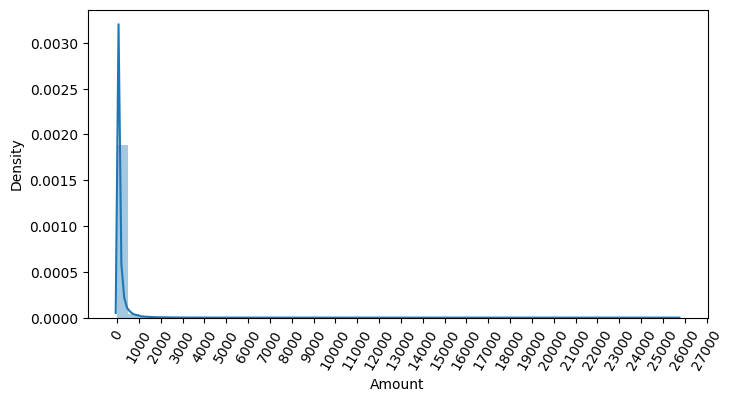

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [ ]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

  df_copy.insert(0, 'Amount_Scaled', amount_n)

  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [ ]:
# Amount 정규 분포 형태로 변환 후 로지스틱, LightBGM수
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85281    14]
 [   58    90]]
accuracy: 0.9992, precision:0.8654, recall: 0.6081, F1: 0.7143, AUC: 0.9702
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()

    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

print('###LightGBM 예측 성능###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

###로지스틱 회귀 예측 성능###
오차행렬
[[85283    12]
 [   59    89]]
accuracy: 0.9992, precision:0.8812, recall: 0.6014, F1: 0.7149, AUC: 0.9727
###LightGBM 예측 성능###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

<Axes: >

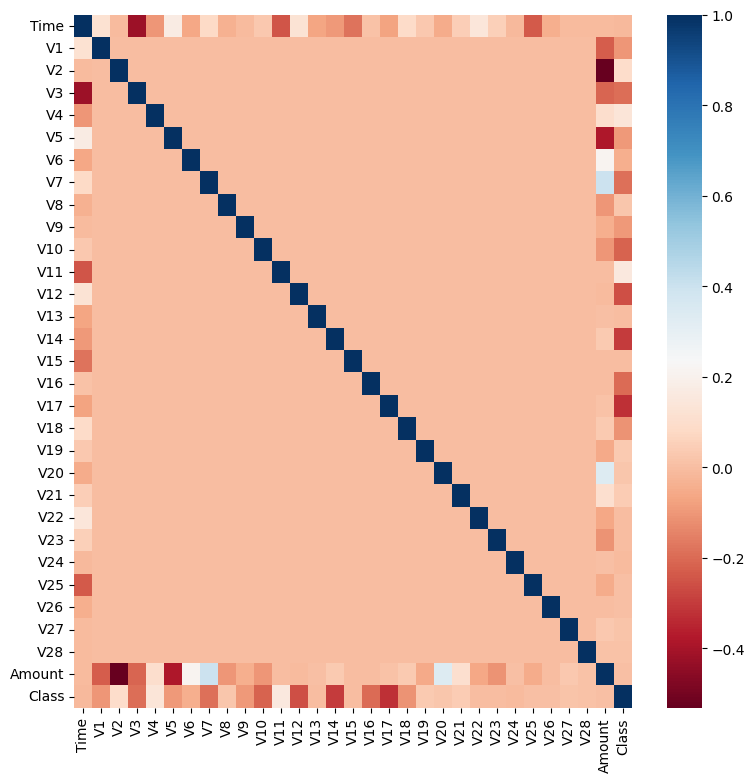

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  # froad 만
  # 25%, 75%지점
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  iqr = quantile_75 - quantile_25

  iqr_weight = iqr*weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
  return outlier_index

In [ ]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('outlier data index', outlier_index)

outlier data index Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
  # 이상치 삭제
  outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis = 0, inplace = True)

  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('Logistic Reg 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test = X_test, tgt_train = y_train,
                     tgt_test = y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test = X_test, tgt_train = y_train,
                     tgt_test = y_test)

Logistic Reg 성능
오차행렬
[[85281    14]
 [   48    98]]
accuracy: 0.9993, precision:0.8750, recall: 0.6712, F1: 0.7597, AUC: 0.9743
LightGBM 성능
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001715 -> initscore=-6.366350
[LightGBM] [Info] Start training from score -6.366350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

# fit_sample > fit_resample??

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 후')
print(X_train.shape, y_train.shape)
print(X_train_over.shape, y_train_over.shape)
print(pd.Series(y_train_over).value_counts())

SMOTE 적용 후
(199362, 29) (199362,)
(398040, 29) (398040,)
0    199020
1    199020
Name: Class, dtype: int64


In [ ]:
lr_clf = LogisticRegression()

get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test = X_test, tgt_train = y_train_over,
                     tgt_test = y_test)

오차행렬
[[82937  2358]
 [   11   135]]
accuracy: 0.9723, precision:0.0542, recall: 0.9247, F1: 0.1023, AUC: 0.9737


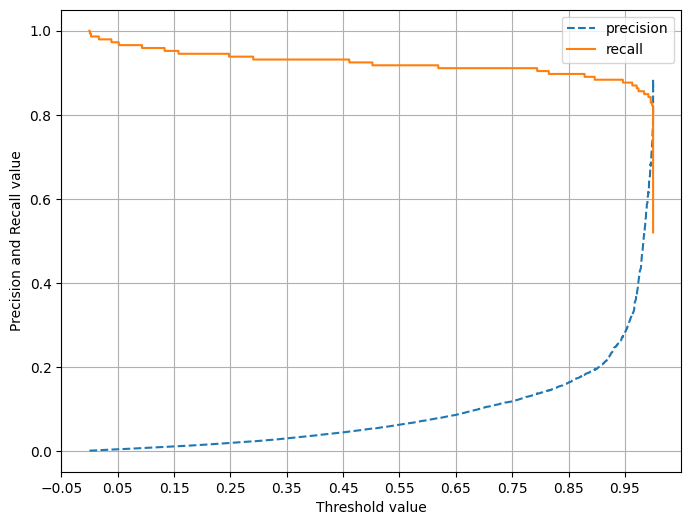

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve


%matplotlib inline


def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 임계점에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도,재현율 값으로 각각 plot수행. 정밀도는 점선
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # x축, y축 label, legend, grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()


precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

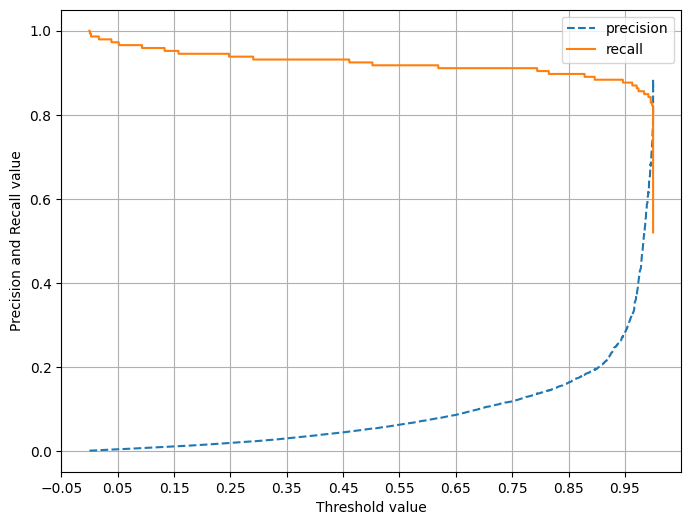

In [ ]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                     tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

# **11**

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)


In [ ]:
# 각 모델 생성/학습/예측/정확도 측정

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10)

knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print(accuracy_score(y_test, knn_pred))
print(accuracy_score(y_test, rf_pred))
print(accuracy_score(y_test, dt_pred))
print(accuracy_score(y_test, ada_pred))

0.9210526315789473
0.9649122807017544
0.9035087719298246
0.956140350877193


In [ ]:
pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])

print(pred.shape)

# transpose>열단위의 예측결과로 피처 생

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 정확도: ')
print(accuracy_score(y_test, final))

최종 메타 모델의 정확도: 
0.9736842105263158


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  kf = KFold(n_splits=n_folds, shuffle=False)

  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__)

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    print(folder_counter)
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    #폴드 세트 내부에서 생성된 데이터로 기반모델 학습/검증>예측
    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 원본 데이터로 예측
    test_pred[:,folder_counter] = model.predict(X_test_n)

  test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)

  # 최종 메타 모델이 사용할 데이터
  return train_fold_pred, test_pred_mean

# 각 기반 모델로 최종 모델이 사용할 데이터 생성
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

# 결과 합치기_스태
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

print('original train data:', X_train.shape,'original test data', X_test.shape)
print('Stacking train data:', Stack_final_X_train.shape,'Stacking test data', Stack_final_X_test.shape)



KNeighborsClassifier
0
1
2
3
4
5
6
RandomForestClassifier
0
1
2
3
4
5
6
DecisionTreeClassifier
0
1
2
3
4
5
6
AdaBoostClassifier
0
1
2
3
4
5
6
original train data: (455, 30) original test data (114, 30)
Stacking train data: (455, 4) Stacking test data (114, 4)


In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델 정확도:{0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델 정확도:0.9737
